## **Fetch Data from PostgreSQL (for me)**

Please delete this section and the code block below before running this notebook to avoid errors.

In [221]:
# Import PostgreSQL adapter and libraries
import psycopg2
import pandas as pd
# Write connection parameters
hostname = 'localhost'
database = 'highlands'
username = 'postgres'
pwd = 'trust'
port_id = 5432 
# Initialize connection and cursor
# Assign to None to avoid UnboundLocalError in finally block
conn = None
cur = None
# Connect to the PostgreSQL server
# Use try-except-finally to ensure proper cleanup
try:
    # Create connection with PostgreSQL database
    conn = psycopg2.connect( 
        host=hostname,
        dbname=database,
        user=username,
        password=pwd,
        port=port_id
    )

    # Create a cursor object
    cur = conn.cursor()

    # Table name list
    table_names = [
        'brand_health',
        'brand_image',
        'companion',
        'competitor_data_for_filter',
        'day_of_week',
        'day_part',
        'need_state',
        'segmentation_2017',
        'survey_respondents_info'
    ]

    # Load all tables into DataFrames, assign to variables, and print first 5 rows
    for table in table_names:
        cur.execute(f'SELECT * FROM public.{table}')
        rows = cur.fetchall()
        colnames = [desc[0] for desc in cur.description]
        df = pd.DataFrame(rows, columns=colnames)
        globals()[table + '_df'] = df

    # Commit any changes (not strictly needed for SELECT, but kept for completeness)
    conn.commit()

# Return error if any occurs
except Exception as error:
    print(error)

# Close cursor and connection to free resources
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

## **Import CSVs file (for visitors)**

Detailed instruction:

1. Download all tables in the data/raw folder.

2. Remove '#' from the start of lines to run the code

3. Replace current file patch with the downloaded dataset file path following this format:

    - file_path = r'your current file path'

4. Import pandas, skip if you installed this package

5. Run the notebook

In [222]:
# Import csv files into DataFrames
# Remove '#' from the start of lines to run the code

#import pandas as pd # pip install pandas
#from pandas import read_csv

#file_path = r'C:\Users\TRUONG\Highlands\simple-pipeline\data\raw'

#brand_health_df = pd.read_csv(f"{file_path}\\brand_health.csv", sep=';', engine='python')
#brand_image_df = pd.read_csv(f"{file_path}\\brand_image.csv", sep=';', engine='python')
#companion_df = pd.read_csv(f"{file_path}\\companion.csv", sep=';', engine='python')
#competitor_data_for_filter_df = pd.read_csv(f"{file_path}\\competitor_data_for_filter.csv", sep=';', engine='python')
#day_of_week_df = pd.read_csv(f"{file_path}\\day_of_week.csv", sep=';', engine='python')
#day_part_df = pd.read_csv(f"{file_path}\\day_part.csv", sep=';', engine='python')
#need_state_df = pd.read_csv(f"{file_path}\\need_state.csv", sep=';', engine='python')
#segmentation_2017_df = pd.read_csv(f"{file_path}\\segmentation_2017.csv", sep=';', engine='python')
#survey_respondents_info_df = pd.read_csv(f"{file_path}\\survey_respondents_info.csv", sep=';', engine='python')


In [223]:
# Print 5 first rows of each DataFrame
print("Brand Health:")
print(brand_health_df.head(), "\n")

print("Brand Image:")
print(brand_image_df.head(), "\n")

print("Companion:")
print(companion_df.head(), "\n")

print("Competitor Data for Filter:")
print(competitor_data_for_filter_df.head(), "\n")

print("Day of Week:")
print(day_of_week_df.head(), "\n")

print("Day Part:")
print(day_part_df.head(), "\n")

print("Need State:")
print(need_state_df.head(), "\n")

print("Segmentation 2017:")
print(segmentation_2017_df.head(), "\n")

print("Survey Respondents Info:")
print(survey_respondents_info_df.head())

Brand Health:
       ID  Year         City      Brand Spontaneous  Awareness Trial   P3M  \
0  345853  2018  Hồ Chí Minh  Phúc Long        None  Phúc Long  None  None   
1  348403  2018  Hồ Chí Minh  Phúc Long        None  Phúc Long  None  None   
2  349552  2018  Hồ Chí Minh  Phúc Long        None  Phúc Long  None  None   
3  349764  2018  Hồ Chí Minh  Phúc Long        None  Phúc Long  None  None   
4  350072  2018  Hồ Chí Minh  Phúc Long        None  Phúc Long  None  None   

    P1M Comprehension Brand_Likability Weekly Daily  Fre#visit  PPA  Spending  \
0  None          None             None   None  None        NaN  NaN       NaN   
1  None          None             None   None  None        NaN  NaN       NaN   
2  None          None             None   None  None        NaN  NaN       NaN   
3  None          None             None   None  None        NaN  NaN       NaN   
4  None          None             None   None  None        NaN  NaN       NaN   

  Segmentation  NPS#P3M NPS#P3

## Import Data Preprocessing Libraries

Please pip install "library name" if you did not install any of them.

In [224]:
# Import data preprocessing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re

# **Data Preprocessing**

## **Data Screening**

**Goal:** Screen all rows of all table to standadize columns' names and format.

    - Convert CamelCase to snake_case".
    - Replace '#' by '_' for readability with regex
    - Convert all to lowercase"

**Process:** Handle the tables one by one with these key steps:

    - Check unique observations of each column.
    - Check missingness of data and fill NA with suitable methods.

**Note:** Because each distinct table has different data errors, the detailed data errors and handling methods will be documented in each table section.

In [225]:
# Check column names
dfs = [
    brand_health_df,
    brand_image_df,
    companion_df,
    competitor_data_for_filter_df,
    day_of_week_df,
    day_part_df,
    need_state_df,
    segmentation_2017_df,
    survey_respondents_info_df
]

for df in dfs:
    print(list(df.columns))

['ID', 'Year', 'City', 'Brand', 'Spontaneous', 'Awareness', 'Trial', 'P3M', 'P1M', 'Comprehension', 'Brand_Likability', 'Weekly', 'Daily', 'Fre#visit', 'PPA', 'Spending', 'Segmentation', 'NPS#P3M', 'NPS#P3M#Group', 'Spending_use']
['ID', 'Year', 'City', 'Awareness', 'Attribute', 'BrandImage']
['ID', 'City', 'Companion#group', 'Year']
['No#', 'Brand', 'City', 'Year', 'StoreCount']
['ID', 'City', 'Dayofweek', 'Visit#Dayofweek', 'Year', 'Weekday#end']
['ID', 'City', 'Daypart', 'Visit#Daypart', 'Year']
['ID', 'City', 'Year', 'Needstates', 'Day#Daypart', 'NeedstateGroup']
['ID', 'Segmentation', 'Visit', 'Spending', 'Brand', 'PPA']
['ID', 'City', 'Group_size', 'Age', 'MPI#Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite', 'Gender', 'MPI#detail', 'Age#group', 'Age#Group#2', 'MPI', 'MPI#2', 'Occupation', 'Occupation#group', 'Year', 'Col', 'MPI_Mean_Use']


In [226]:
# Apply to all columns
for df in dfs:
    df.columns = df.columns.str.replace('#', '_', regex=False)
    print(list(df.columns))

['ID', 'Year', 'City', 'Brand', 'Spontaneous', 'Awareness', 'Trial', 'P3M', 'P1M', 'Comprehension', 'Brand_Likability', 'Weekly', 'Daily', 'Fre_visit', 'PPA', 'Spending', 'Segmentation', 'NPS_P3M', 'NPS_P3M_Group', 'Spending_use']
['ID', 'Year', 'City', 'Awareness', 'Attribute', 'BrandImage']
['ID', 'City', 'Companion_group', 'Year']
['No_', 'Brand', 'City', 'Year', 'StoreCount']
['ID', 'City', 'Dayofweek', 'Visit_Dayofweek', 'Year', 'Weekday_end']
['ID', 'City', 'Daypart', 'Visit_Daypart', 'Year']
['ID', 'City', 'Year', 'Needstates', 'Day_Daypart', 'NeedstateGroup']
['ID', 'Segmentation', 'Visit', 'Spending', 'Brand', 'PPA']
['ID', 'City', 'Group_size', 'Age', 'MPI_Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite', 'Gender', 'MPI_detail', 'Age_group', 'Age_Group_2', 'MPI', 'MPI_2', 'Occupation', 'Occupation_group', 'Year', 'Col', 'MPI_Mean_Use']


In [227]:
# Function to split CamelCase while keeping acronyms intact
def split_camel_case_keep_acronyms(name):
    """
    Convert CamelCase to Snake_Case while keeping acronyms intact.
    
    Examples:
    - 'MostFavourite' -> 'Most_Favourite'
    - 'CustomerMPIValue' -> 'Customer_MPI_Value'
    - 'NPSScore' -> 'NPS_Score'
    """
    # Insert underscore between:
    #   1. a lowercase letter and uppercase letter (e.g., tM -> t_M)
    #   2. but NOT between consecutive uppercase letters (e.g., MPI stays MPI)
    return re.sub(r'(?<=[a-z])(?=[A-Z])', '_', name)


In [228]:
# Apply the function to all DataFrames
for df in dfs:
    df.columns = [split_camel_case_keep_acronyms(col) for col in df.columns]
    print(list(df.columns))

['ID', 'Year', 'City', 'Brand', 'Spontaneous', 'Awareness', 'Trial', 'P3M', 'P1M', 'Comprehension', 'Brand_Likability', 'Weekly', 'Daily', 'Fre_visit', 'PPA', 'Spending', 'Segmentation', 'NPS_P3M', 'NPS_P3M_Group', 'Spending_use']
['ID', 'Year', 'City', 'Awareness', 'Attribute', 'Brand_Image']
['ID', 'City', 'Companion_group', 'Year']
['No_', 'Brand', 'City', 'Year', 'Store_Count']
['ID', 'City', 'Dayofweek', 'Visit_Dayofweek', 'Year', 'Weekday_end']
['ID', 'City', 'Daypart', 'Visit_Daypart', 'Year']
['ID', 'City', 'Year', 'Needstates', 'Day_Daypart', 'Needstate_Group']
['ID', 'Segmentation', 'Visit', 'Spending', 'Brand', 'PPA']
['ID', 'City', 'Group_size', 'Age', 'MPI_Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'Most_Favourite', 'Gender', 'MPI_detail', 'Age_group', 'Age_Group_2', 'MPI', 'MPI_2', 'Occupation', 'Occupation_group', 'Year', 'Col', 'MPI_Mean_Use']


In [229]:
# Convert all column names to lowercase
for df in dfs:
    df.columns = df.columns.str.lower()
    print(list(df.columns))

['id', 'year', 'city', 'brand', 'spontaneous', 'awareness', 'trial', 'p3m', 'p1m', 'comprehension', 'brand_likability', 'weekly', 'daily', 'fre_visit', 'ppa', 'spending', 'segmentation', 'nps_p3m', 'nps_p3m_group', 'spending_use']
['id', 'year', 'city', 'awareness', 'attribute', 'brand_image']
['id', 'city', 'companion_group', 'year']
['no_', 'brand', 'city', 'year', 'store_count']
['id', 'city', 'dayofweek', 'visit_dayofweek', 'year', 'weekday_end']
['id', 'city', 'daypart', 'visit_daypart', 'year']
['id', 'city', 'year', 'needstates', 'day_daypart', 'needstate_group']
['id', 'segmentation', 'visit', 'spending', 'brand', 'ppa']
['id', 'city', 'group_size', 'age', 'mpi_mean', 'tom', 'bumo', 'bumo_previous', 'most_favourite', 'gender', 'mpi_detail', 'age_group', 'age_group_2', 'mpi', 'mpi_2', 'occupation', 'occupation_group', 'year', 'col', 'mpi_mean_use']


In [230]:
# Sort all tables by ID columns
for df in dfs:
    id_columns = [col for col in df.columns if 'id' in col]
    if id_columns:
        df.sort_values(by=id_columns, inplace=True)
        df.reset_index(drop=True, inplace=True)


## Survey Respondent Info Table
**Description:** Table contains the infomation of each respondent including demographics info.

**Key summary:**

1. Given this table contains survey respondents' information, no ID should be duplicated. No duplicate is founded.

2. Although the data categorized occupations into different groups, it appears to be not suitable enough. Therefore, I categorized these occupations with new group labels based on my own rationales. 

3. The data has a lot of missing values in mpi-related column. The missing type should be MCAR because there is no distinctive missing pattern in specific categories.
    
    - Missing values are filled by "Refuse".

4. The mpi_mean column is a numeric column containing midppint value of the range in mpi_detail. For example, mpi_detail (in million VND) is  "4.5  - 6.49", then mean is 5499. Having checked if data follows this pattern, no error was found.

5. Regarding age, its % of missingness is very small. Therefore, missing cells are filled with median of respective demographic traits (city, year, mpi).

6. Missing values in bumo_previous are also filled with "Refuse".



In [231]:
#Describe data distribution and data type
print(survey_respondents_info_df.head())
print("-" * 50)
print(survey_respondents_info_df.describe())
print("-" * 50)
print(survey_respondents_info_df.info())

      id         city  group_size   age  mpi_mean               tom  \
0  89100  Hồ Chí Minh         4.0  39.0       NaN   Indepedent Cafe   
1  89101  Hồ Chí Minh         4.0  33.0       NaN   Indepedent Cafe   
2  89102  Hồ Chí Minh         4.0  17.0       NaN  Highlands Coffee   
3  89613  Hồ Chí Minh         3.0  55.0       NaN      Trung Nguyên   
4  89616  Hồ Chí Minh         2.0  60.0       NaN      Trung Nguyên   

                                            bumo          bumo_previous  \
0  Street / Half street coffee (including carts)        Indepedent Cafe   
1                                    Saigon Café                  Effoc   
2                               Highlands Coffee       The Coffee House   
3                                   Trung Nguyên  Don't have any brands   
4                                   Trung Nguyên  Don't have any brands   

     most_favourite  gender mpi_detail age_group   age_group_2   mpi mpi_2  \
0   Indepedent Cafe  Female       None   30 

In [232]:
# Check unique values in columns
for column_name in survey_respondents_info_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(survey_respondents_info_df[column_name].unique())
    print("\n")

Unique values in column 'id':
[ 89100  89101  89102 ... 862137 862458 863754]


Unique values in column 'city':
['Hồ Chí Minh' 'Cần Thơ' 'Hà Nội' 'Hải Phòng' 'Đà Nẵng' 'Nha Trang']


Unique values in column 'group_size':
[ 4.  3.  2.  5.  1.  6.  7.  8. 10. 24.  9. 30. 35. 28. 12. 20. nan]


Unique values in column 'age':
[39. 33. 17. 55. 60. 19. 49. 53. 50. 36. 27. 44. 47. 40. 18. 57. 35. 38.
 51. 31. 20. 30. 32. 52. 34. 46. 48. 37. 24. 41. 26. 43. 59. 23. 45. 56.
 58. 25. 22. 42. 21. 29. 28. 54. 16. nan]


Unique values in column 'mpi_mean':
[    nan   6999.   1499.  10499.   3749.   5499.  17499.   8249.  22499.
  13499. 112499.  27499.  37499.  59999.]


Unique values in column 'tom':
['Indepedent Cafe' 'Highlands Coffee' 'Trung Nguyên'
 'Street / Half street coffee (including carts)' 'Phúc Long' 'Milano'
 'Other Branded Cafe Chain' 'Gong Cha' 'The Coffee House' 'Passio'
 'KOI cafe' 'Effoc' 'Starbucks' 'Maxx Coffee' 'Cộng Cà Phê'
 'Urban Station' 'Thức Coffee' 'The Coffee Factory'


### **Check ID uniqueness**

In [233]:
# Create a function to check ID uniqueness
def check_id_uniqueness(df, id_column='id'):
    """
    Check if the specified ID column in a DataFrame contains unique values.
    Prints duplicate IDs and their counts if any are found.
    """

    """
    Steps:
    1. Count frequency of each ID.
    2. If all frequencies are 1, IDs are unique.
    3. If any frequency > 1, there are duplicate IDs.
    4. Print duplicate IDs with their counts.
    """
    # Step 1: Count frequency of each ID
    id_counts = df[id_column].value_counts()

    # Step 2: Check if all IDs are unique
    if (id_counts == 1).all():
        print("All IDs are unique.")
    else:
        print("Duplicate IDs found!")

        # Step 3: Filter IDs where frequency > 1
        duplicates = id_counts[id_counts > 1]

        # Step 4: Print duplicate IDs and their counts
        print("\nDuplicated IDs and their counts:")
        print(duplicates)

In [234]:
# Check uniqueness of 'id' column in survey_respondents_info_df
check_id_uniqueness(survey_respondents_info_df, id_column='id')

All IDs are unique.


### **Create New Categories for Occupations**

In [235]:
# Create a job mapping dictionary 
job_mapping = {
        'Unskilled Labor (worker, landry person, driver, security guard, cleaner)': 'Unskilled Labor',
        'Skilled Labor (tailor, machinist, carpenter, electrician)': 'Skilled Labor',
        'Semi-skilled labor (salesperson, waiter, photographer)': 'Semi-skilled Labor',
        'Agriculture / Forestry (Fishing, planting, farming)': 'Semi-skilled Labor',
        'Officer - Staff level': 'Office Worker',
        'Junior Manager / Executive': 'Office Worker',
        'Officer - Middle Management': 'Office Worker',
        'Officer - Senior Management': 'Office Worker',
        'Civil servant - Staff level': 'Office Worker',
        'Civil servant  - Middle Management': 'Office Worker',
        'Civil servant  - Senior Management': 'Office Worker',
        'Military / Police': 'Office Worker',
        'Lecturer / Teacher': 'Professional Roles',
        'Professional (doctor, engineer, architect, nursing staff, lawyer, researcher, etc.)': 'Professional Roles',
        'Small Business (small shop owner, grocery store, etc.)': 'SME Business Owner',
        'Business Owner with less than 10 employees': 'SME Business Owner',
        'Self Employed  - Company owner (under 10 employees)': 'SME Business Owner',
        'Self Employed - Company owner (10 - 20 employees)': 'SME Business Owner',
        'Broker/ Service provider with no employee': 'Artist, Broker & Freelancer',
        'Artist (actor/actress, singer, painter, model)': 'Artist, Broker & Freelancer',
        'Freelance': 'Artist, Broker & Freelancer',
        'Housewife': 'Non-working',
        'Retirement': 'Non-working',
        'Pupil / Student': 'Student',
        'Unemployed': 'Non-working',
        'Job hunting': 'Non-working',
        'Refuse': 'Refuse',
        'Other': 'Refuse'
    }

In [236]:
# Create new occupation group
survey_respondents_info_df['standardized_occupation'] = survey_respondents_info_df['occupation'].map(job_mapping)

# Count frequency of each group
count_standardized_occupation = survey_respondents_info_df['standardized_occupation'].value_counts()
print(f"Count Frequencies of Each Occupation:\n{count_standardized_occupation}")

Count Frequencies of Each Occupation:
standardized_occupation
Office Worker                  2238
Unskilled Labor                1994
Non-working                    1765
SME Business Owner             1299
Student                        1235
Skilled Labor                  1103
Artist, Broker & Freelancer     950
Professional Roles              601
Semi-skilled Labor              555
Refuse                           21
Name: count, dtype: int64


### **Handle Missing Values**

In [237]:
# Missingness summary,
miss_summary = (
    survey_respondents_info_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(survey_respondents_info_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                         Number of Missing  Percentage of Missing
Column                                                           
bumo_previous                         5665                  48.17
mpi                                   3717                  31.60
mpi_2                                 3717                  31.60
mpi_mean_use                          3717                  31.60
mpi_mean                              3717                  31.60
mpi_detail                            3685                  31.33
group_size                              15                   0.13
age                                      9                   0.08
age_group                                9                   0.08
age_group_2                              9                   0.08
id                                       0                   0.00
city                                     0                   0.00
most_favourite                           0 

#### **Standardize data labels**

In [238]:
# Standardize MPI detail,
replacement = {"From" : "",  "to" :  "-" ,  "millions": "", "million": "",  "VND": "", "Under" : "<", "< 3": "0 - 2.99"}
for old_words, new_words in replacement.items():
    survey_respondents_info_df['mpi_detail'] = survey_respondents_info_df['mpi_detail'].str.replace(old_words, new_words)

print("Unique values after standardization:"),
print(survey_respondents_info_df['mpi_detail'].unique())

Unique values after standardization:
[None ' 6.5  - 7.49  ' '0 - 2.99  ' ' 9  - 11.99  ' ' 3  - 4.49  '
 ' 4.5  - 6.49  ' ' 15  - 19.99  ' ' 7.5  - 8.99  ' ' 20  - 24.99  '
 ' 12  - 14.99  ' ' 75  -  149.99  ' ' 25  - 29.99  ' ' 30  - 44.99  '
 'Refuse' ' 45  - 74.99  ']


In [239]:
# Standardize MP
replacement = {"From" : "",  "to" :  "-" ,  "m": "",  "VND": "", "Under" : "<", "< 4.5": "0 - 4.49"}
for old_words, new_words in replacement.items():
    survey_respondents_info_df['mpi'] = survey_respondents_info_df['mpi'].str.replace(old_words, new_words)
    
print("Unique values after standardization:")
print(survey_respondents_info_df['mpi'].unique())

Unique values after standardization:
[None ' 4.5 -  8.9' '<  4.5' ' 9 -  14.9' ' 15 -  24.9' ' 25+']


#### **Check mpi_mean Values vs mpi_detail Midpoint**

In [240]:
# Check if MPI means the same as MPI detail

# Step 1: Split MPI detail into 2 columns, delimited by " - "
mpi_split = survey_respondents_info_df['mpi_detail'].str.split(' - ', expand=True)
mpi_split.columns = ['mpi_detail_min', 'mpi_detail_max']

# Step 2: Calculate the midpoint of MPI detail ranges with 2 new columns
mpi_split['mpi_detail_min'] = (
    mpi_split['mpi_detail_min']
    .replace('Refuse', np.nan)   # Replace text "Refuse" with NaN
    .astype(float)                # Convert to float
)

mpi_split['mpi_detail_max'] = (
    mpi_split['mpi_detail_max']
    .replace('Refuse', np.nan)   # Replace text "Refuse" with NaN
    .astype(float)                # Convert to float
)

mpi_split['mpi_detail_mid'] = (mpi_split['mpi_detail_min'] + mpi_split['mpi_detail_max']) / 2 # Calculate midpoint

# Step 3: Add MPI mean column to mpi_split for comparison
mpi_split['mpi_mean'] = survey_respondents_info_df['mpi_mean'].round(3).astype(float)
mpi_split['mpi_detail_mid'] = mpi_split['mpi_detail_mid'].round(3) * 1000

# Step 4: Compare the midpoint with MPI mean
mpi_split['mpi_diff'] = survey_respondents_info_df['mpi_mean'] - mpi_split['mpi_detail_mid']

# Step 5: Check differences
if mpi_split['mpi_diff'].abs().max() <= 4:
    print("MPI mean matches MPI detail midpoint for all records.")  
else:
    print("Discrepancies found between MPI mean and MPI detail midpoint.")
    print(mpi_split[mpi_split['mpi_diff'].abs() > 4])

MPI mean matches MPI detail midpoint for all records.


#### **Impute MPI-related Columns**

In [241]:
# Replace missing values in mpi_detail and mpi with "Refuse"
survey_respondents_info_df['mpi_detail'] = survey_respondents_info_df['mpi_detail'].fillna('Refuse')
survey_respondents_info_df['mpi'] = survey_respondents_info_df['mpi'].fillna('Refuse')

# Replace missing values in mpi_mean with "0"
survey_respondents_info_df['mpi_mean'] = survey_respondents_info_df['mpi_mean'].fillna(0)

# Missing values summary
print("Missing Values Summary After Imputation:")
print(survey_respondents_info_df[['mpi_detail','mpi','mpi_mean']].isna().sum())

Missing Values Summary After Imputation:
mpi_detail    0
mpi           0
mpi_mean      0
dtype: int64


#### **Impute Age-related Columns**

In [242]:
# Step 1: Impute missing age values using median age of groups defined by demographics

# Select demographics for grouping
demographics = ['mpi_detail', 'occupation', 'city']

# Calculate median age by group
median_by_group = survey_respondents_info_df.groupby(demographics, dropna=True)['age'].transform('median')

# Impute missing age values with group median
survey_respondents_info_df['age_imputed'] = survey_respondents_info_df['age'].fillna(median_by_group)

#check number of missing values before and after imputation
print("Missing before:", survey_respondents_info_df['age'].isna().sum())
print("Missing after :", survey_respondents_info_df['age_imputed'].isna().sum())

Missing before: 9
Missing after : 0


In [243]:
# Step 2: Categorize the age to age_sub_group and age_group

# Create bins and labels for age_group and age_sub_group
age_group_bins = [15, 19, 29, 39, np.inf]
age_group_labels = ['16 - 19', '20 - 29', '30 - 39', '40 - 60']
age_sub_group_bins = [15, 19, 24, 29, 34, 39, 44, np.inf] 
age_sub_group_labels = ['16 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45+']

# Categorize age_imputed into age_sub_group and age_group
survey_respondents_info_df['age_group_new'] = pd.cut(survey_respondents_info_df['age_imputed'], bins=age_group_bins, labels=age_group_labels, right=True, include_lowest=False)
survey_respondents_info_df['age_sub_group'] = pd.cut(survey_respondents_info_df['age_imputed'], bins=age_sub_group_bins, labels=age_sub_group_labels, right=True, include_lowest=False)


In [244]:
# Replace missing values in "bumo_previous" 
survey_respondents_info_df['bumo_previous'] = survey_respondents_info_df['bumo_previous'].fillna('Refuse')



#### **Impute Missing 'group_size' with Its Mode**

In [245]:
# Calculate mode group_size
mode_by_group = survey_respondents_info_df['group_size'].mode()[0]
# Impute missing group_size values its mode
survey_respondents_info_df['group_size_imputed'] = survey_respondents_info_df['group_size'].fillna(mode_by_group)

#check number of missing values before and after imputation
print("Missing before:", survey_respondents_info_df['group_size'].isna().sum())
print("Missing after :", survey_respondents_info_df['group_size_imputed'].isna().sum())

Missing before: 15
Missing after : 0


#### **Check Missingness After Imputation**

In [246]:
# Missingness summary
miss_summary = (
    survey_respondents_info_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(survey_respondents_info_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                         Number of Missing  Percentage of Missing
Column                                                           
mpi_2                                 3717                  31.60
mpi_mean_use                          3717                  31.60
group_size                              15                   0.13
age                                      9                   0.08
age_group                                9                   0.08
age_group_2                              9                   0.08
id                                       0                   0.00
city                                     0                   0.00
mpi_mean                                 0                   0.00
most_favourite                           0                   0.00
bumo_previous                            0                   0.00
bumo                                     0                   0.00
tom                                      0 

#### **Table Formatting**

In [247]:
# Drop redundant columns, rename columns, and reorder columns
# Reorder columns
# Remove redundant columns
redundant_columns = ['age_group', 'age_group_2', 'age', 'mpi_2', 'mpi_mean_use', 'occupation_group', 'group_size','col']
survey_respondents_info_df = survey_respondents_info_df.drop(columns=redundant_columns, errors='ignore')

# Change column names
survey_respondents_info_df = survey_respondents_info_df.rename(columns={'age_group_new': 'age_group', 'age_imputed': 'age', 'standardized_occupation': 'occupation_group', 'group_size_imputed': 'group_size'})

# Define the desired order of columns
first_columns = ['id', 'gender', 'city', 'year', 'group_size', 'tom','bumo','bumo_previous', 'most_favourite']

other_columns = [column for column in survey_respondents_info_df.columns if column not in first_columns]


# Sort other columns alphabetically
sorted_other_columns = sorted(other_columns)

# Combine the lists to get the new column order
new_column_order = first_columns + sorted_other_columns

# Reorder the DataFrame columns
survey_respondents_info_df = survey_respondents_info_df[new_column_order]

print(survey_respondents_info_df.head())

      id  gender         city  year  group_size               tom  \
0  89100  Female  Hồ Chí Minh  2017         4.0   Indepedent Cafe   
1  89101  Female  Hồ Chí Minh  2017         4.0   Indepedent Cafe   
2  89102    Male  Hồ Chí Minh  2017         4.0  Highlands Coffee   
3  89613    Male  Hồ Chí Minh  2017         3.0      Trung Nguyên   
4  89616    Male  Hồ Chí Minh  2017         2.0      Trung Nguyên   

                                            bumo          bumo_previous  \
0  Street / Half street coffee (including carts)        Indepedent Cafe   
1                                    Saigon Café                  Effoc   
2                               Highlands Coffee       The Coffee House   
3                                   Trung Nguyên  Don't have any brands   
4                                   Trung Nguyên  Don't have any brands   

     most_favourite   age age_group age_sub_group     mpi mpi_detail  \
0   Indepedent Cafe  39.0   30 - 39       35 - 39  Refuse     

#### **Check Abnormal IDs in Other Tables**

In [248]:
# As survey_respondents_info_df is the reference, check if ids in all tables exist in survey_respondents_info_df
for df in dfs:
    if 'id' in df.columns:
        missing_ids = df[~df['id'].isin(survey_respondents_info_df['id'])]
        if not missing_ids.empty:
            print(f"IDs in {df} that do not exist in survey_respondents_info_df:")
            print(missing_ids['id'].unique())
        else:
            print("All IDs in dataframes exist in survey_respondents_info_df.")
            

All IDs in dataframes exist in survey_respondents_info_df.
All IDs in dataframes exist in survey_respondents_info_df.
All IDs in dataframes exist in survey_respondents_info_df.
All IDs in dataframes exist in survey_respondents_info_df.
All IDs in dataframes exist in survey_respondents_info_df.
All IDs in dataframes exist in survey_respondents_info_df.
All IDs in dataframes exist in survey_respondents_info_df.
All IDs in dataframes exist in survey_respondents_info_df.


## **Brand Image Table**
**Description:** Table contains the images associated with specific brands.

**Key summary:**

1. Because all data in 'awareness' is similar with 'brand_image', this column was dropped.



In [249]:
#Describe data distribution and data type
print(brand_image_df.head())
print("-" * 50)
print(brand_image_df.describe())
print("-" * 50)
print(brand_image_df.info())

      id  year         city                                      awareness  \
0  89100  2017  Hồ Chí Minh  Street / Half street coffee (including carts)   
1  89100  2017  Hồ Chí Minh                                   Trung Nguyên   
2  89100  2017  Hồ Chí Minh  Street / Half street coffee (including carts)   
3  89100  2017  Hồ Chí Minh                                Indepedent Cafe   
4  89100  2017  Hồ Chí Minh                                   Trung Nguyên   

                              attribute  \
0  Comfortable and relaxing environment   
1                   Convenient location   
2                        Friendly staff   
3                         Trusted brand   
4                        Friendly staff   

                                     brand_image  
0  Street / Half street coffee (including carts)  
1                                   Trung Nguyên  
2  Street / Half street coffee (including carts)  
3                                Indepedent Cafe  
4                

In [250]:
# Check unique values in columns
for column_name in brand_image_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(brand_image_df[column_name].unique())
    print("\n")

Unique values in column 'id':
[ 89100  89101  89102 ... 862137 862458 863754]


Unique values in column 'year':
[2017 2018 2019]


Unique values in column 'city':
['Hồ Chí Minh' 'Cần Thơ' 'Hà Nội' 'Hải Phòng' 'Đà Nẵng' 'Nha Trang']


Unique values in column 'awareness':
['Street / Half street coffee (including carts)' 'Trung Nguyên'
 'Indepedent Cafe' 'The Coffee Factory' 'Gong Cha' 'Milano' 'Saigon Café'
 'Effoc' 'Coffee Bean & Tea Leaf' 'Highlands Coffee' 'Phúc Long'
 'Starbucks' 'Thức Coffee' 'The Coffee House' 'KOI cafe' 'Urban Station'
 'Passio' None 'Maxx Coffee' 'Cộng Cà Phê' 'Other Branded Cafe Chain'
 'Other 3' 'Other 1' 'Other 2' 'Đen Đá' 'Viva Star' 'Mộc Miên'
 'Runam cafe' 'Aha Cafe' 'Long Cafe' 'BonPas' 'Nia cafe' 'Other'
 'The Cups Coffee' 'Mê Trang' 'Street' 'Laha Coffee' 'Cheese Coffee']


Unique values in column 'attribute':
['Comfortable and relaxing environment' 'Convenient location'
 'Friendly staff' 'Trusted brand' 'Good value for money'
 'Good other beverages (oth

In [251]:
# Fix grammar error 'Indepedent' to 'Independent'
brand_image_df['brand_image'] = brand_image_df['brand_image'].replace('Indepedent Cafe', 'Independent Cafe')

### **Relabel and Categorize Attributes**

In [252]:
# Create a dictionary to relabel values in 'attribute'
replacement = {
    'Comfortable and relaxing environment': 'Comfortable environment',
    'Convenient location': 'Convenient location',
    'Friendly staff': 'Friendly staff',
    'Trusted brand': 'Trusted brand',
    'Good value for money': 'Value for money',
    'Good other beverages (other than coffee, tea & ice-blended)': 'Good other beverages',
    'Good place for socializing': 'Socializing place',
    'Nice environment design': 'Attractive design',
    'Feel I belong here': 'Sense of belonging',
    'Diversified menu': 'Varied menu',
    'Good place for relaxing': 'Relaxing place',
    'Good place for working / studying': 'Work/study friendly',
    'Quick speed of service': 'Fast service',
    'Good tea taste': 'Good tea',
    'Popular brand': 'Popular brand',
    'Good coffee taste': 'Good coffee',
    'Clean': 'Cleanliness',
    'Recommended by others': 'Peer recommended',
    'High speed of internet': 'Fast internet',
    'Good music': 'Good music',
    'Delicious food': 'Good food',
    'Good place for socializing with family': 'Family-friendly place',
    'Good place for socializing with friends': 'Friends hangout place',
    'Good place for socializing with colleagues': 'Colleague meeting place',
    'Good place for working / business meeting': 'Business meeting place',
    'Have new product regularly': 'Regular new products',
    'Good place for studying': 'Study-friendly place',
    'Good ice-blended taste': 'Good ice-blended drinks'
}


In [253]:
# Relabel values in 'attribute' column
for old_value, new_value in replacement.items():
    brand_image_df['attribute'] = brand_image_df['attribute'].replace(old_value, new_value)

# Print unique values after relabeling
print("Unique values after relabeling:")
print(brand_image_df['attribute'].unique())

Unique values after relabeling:
['Comfortable environment' 'Convenient location' 'Friendly staff'
 'Trusted brand' 'Value for money' 'Good other beverages'
 'Socializing place' 'Attractive design' 'Sense of belonging'
 'Varied menu' 'Relaxing place' 'Work/study friendly' 'Fast service'
 'Good tea' 'Popular brand' 'Good coffee' 'Cleanliness' 'Peer recommended'
 'Fast internet' 'Good music' 'Good food' 'Family-friendly place'
 'Friends hangout place' 'Colleague meeting place'
 'Business meeting place' 'Regular new products' 'Study-friendly place'
 'Good ice-blended drinks']


In [254]:
# Create a dictionary to categorize 'attribute' into 'attribute_group'
group = {
    # --- Product Quality ---
    'Good coffee': 'Product Quality',
    'Good tea': 'Product Quality',
    'Good other beverages': 'Product Quality',
    'Good ice-blended drinks': 'Product Quality',
    'Good food': 'Product Quality',
    'Varied menu': 'Product Quality',
    'Value for money': 'Product Quality',
    'Regular new products': 'Product Quality',

    # --- Environment ---
    'Comfortable environment': 'Environment',
    'Relaxing place': 'Environment',
    'Attractive design': 'Environment',
    'Cleanliness': 'Environment',
    'Good music': 'Environment',
    'Fast internet': 'Environment',
    'Sense of belonging': 'Environment',

    # --- Popularity & Service ---
    'Trusted brand': 'Popularity & Service',
    'Popular brand': 'Popularity & Service',
    'Peer recommended': 'Popularity & Service',
    
    'Convenient location': 'Popularity & Service',
    'Friendly staff': 'Popularity & Service',
    'Fast service': 'Popularity & Service',

    # --- Multi-purpose ---
    'Socializing place': 'Multi-purpose',
    'Family-friendly place': 'Multi-purpose',
    'Friends hangout place': 'Multi-purpose',
    'Colleague meeting place': 'Multi-purpose',
    'Business meeting place': 'Multi-purpose',
    'Work/study friendly': 'Multi-purpose',
    'Study-friendly place': 'Multi-purpose'
}


In [255]:
# Create 'attribute_group' column
brand_image_df['attribute_group'] = brand_image_df['attribute'].map(group)

# Print unique values in 'attribute_group'
print("Unique values in 'attribute_group':")
print(brand_image_df['attribute_group'].unique())

Unique values in 'attribute_group':
['Environment' 'Popularity & Service' 'Product Quality' 'Multi-purpose']


### **Handle Missing Values**

In [256]:
# Missingness summary,
miss_summary = (
    brand_image_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(brand_image_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                 Number of Missing  Percentage of Missing
Column                                                   
awareness                      397                   0.06
year                             0                   0.00
id                               0                   0.00
city                             0                   0.00
attribute                        0                   0.00
brand_image                      0                   0.00
attribute_group                  0                   0.00


#### **Check if 'awareness' is a Duplicated Version of 'brand_image'**

In [257]:
# Count how many rows having 'awareness' is similar with 'brand_image'
missing_rows = brand_image_df[brand_image_df['awareness'].isna()]
not_missing_rows = brand_image_df[brand_image_df['awareness'].notna()]

print(f"Total number of rows: {len(brand_image_df)}")
print(f"Total number of non-missing rows: {len(not_missing_rows)}")
print(f"Total number of missing rows: {len(missing_rows)}")

# Check if values in 'awareness' are similar to 'brand_image'
similar_awareness = brand_image_df[brand_image_df['awareness'] == brand_image_df['brand_image']]
print(f"Total number of similar rows: {len(similar_awareness)}")


Total number of rows: 643072
Total number of non-missing rows: 642675
Total number of missing rows: 397
Total number of similar rows: 609121


In [258]:
# Drop 'awareness' column since it is similar to 'brand_image'
brand_image_df = brand_image_df.drop(columns=['awareness'], errors='ignore')

#### **Check Missingness After Imputation**

In [259]:
# Missingness summary,
miss_summary = (
    brand_image_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(brand_image_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                 Number of Missing  Percentage of Missing
Column                                                   
id                               0                    0.0
year                             0                    0.0
city                             0                    0.0
attribute                        0                    0.0
brand_image                      0                    0.0
attribute_group                  0                    0.0


## **Segmentation2017 Table**

**Description:** Table contains respondents information of the year 2017.

**Key summary:**

1. Fix grammar error "Indepentdent" to "Independent" in 'brand_type'.

In [260]:
#Describe data distribution and data type
print(segmentation_2017_df.head())
print("-" * 50)
print(segmentation_2017_df.describe())
print("-" * 50)
print(segmentation_2017_df.info())

      id                           segmentation  visit  spending  \
0  89100               Seg.01 - Mass (<VND 25K)      6        90   
1  89100   Seg.03 - Premium (VND 60K - VND 99K)      2       120   
2  89100     Seg.04 - Super Premium (VND 100K+)      4       400   
3  89101               Seg.01 - Mass (<VND 25K)      1        10   
4  89101  Seg.02 - Mass Asp (VND 25K - VND 59K)      2        60   

          brand  ppa  
0        Street   15  
1         Chain   60  
2  Indepentdent  100  
3        Street   10  
4         Chain   30  
--------------------------------------------------
                  id        visit     spending          ppa
count    4944.000000  4944.000000  4944.000000  4944.000000
mean   124746.726739     9.286003   185.212783    26.125607
std     14200.003243    11.251593   208.383542    17.454006
min     89100.000000     1.000000     6.000000     5.000000
25%    113279.500000     3.000000    60.000000    12.000000
50%    127602.500000     4.000000   120.00

In [261]:
# Check unique values in columns
for column_name in segmentation_2017_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(segmentation_2017_df[column_name].unique())
    print("\n")

Unique values in column 'id':
[ 89100  89101  89102 ... 141597 141679 142479]


Unique values in column 'segmentation':
['Seg.01 - Mass (<VND 25K)' 'Seg.03 - Premium (VND 60K - VND 99K)'
 'Seg.04 - Super Premium (VND 100K+)'
 'Seg.02 - Mass Asp (VND 25K - VND 59K)']


Unique values in column 'visit':
[  6   2   4   1  10   3  30   8   7  17  11  12  18   5  14  24  20  26
  16   9  15  23  29  28  75  22  60  40  25  13  27  50 120 100  80  90
  38 111  45  19  55  32  56  35  33  21  88  31  89]


Unique values in column 'spending':
[  90  120  400   10   60  300   96  140   84   50   39  360  240  200
  440   45  320  210  221  150   40   30   35  110  270  180   48  100
  315   20   80  500   25  376  144   15  480  250   75   42   44  112
   78 1120  220  450   36  780  230  800  540  330  288   24  600  280
 2100  260   68   16  160 1080   72  192   17  275   55   12  345  156
  108  225   21  130  700 1500  290   70   28  105  125   64   32  750
   98  224   14  660  420  960   1

In [262]:
# View unique values of brand
print(segmentation_2017_df['brand'].unique())

# Fix grammar error in brand
segmentation_2017_df['brand'] = segmentation_2017_df['brand'].replace('Indepentdent', 'Independent')

# After correction
print(segmentation_2017_df['brand'].unique())

['Street' 'Chain' 'Indepentdent']
['Street' 'Chain' 'Independent']


In [263]:
# Rename 'brand' to 'brand_type'
segmentation_2017_df = segmentation_2017_df.rename(columns={'brand': 'brand_type'})

## **Brand Health Table**

**Description:** Table contains detailed survey responses measuring brand awareness, usage, perception, and customer segmentation across coffee brands.

**Key summary:**

1. 'spontaneous', 'trial', 'p3m', 'p1m', 'brand_likability', 'weekly', 'daily' have a huge % of missing data. The non-misisng data in these columns are similar to data in 'brand'. Further, based on the data dictionary, questions collecting the info appear to be Yes/No questions. Therefore, NA were filled with "No" and other values were repalced by "Yes".

2. 'comprehension' is completely missing in year 2017, while 'brand likability' is completely missing in year 2017 and 2018. The severe missingness can root from error in data entry or these question were not asked in year 2017 and 2018. I select the later assumption during analyze the data in the later section.

3. 'segmentation', 'spending', 'ppa' are completly missing in year 2017. Given segmentation_2017_df contains respondents info in 2017, this table is used to fill NA in 'segmentation', 'spending', 'ppa'. Only rows of data in 2017 with 'visit' is not NA are filled by the segmentation_2017_df.

In [264]:
#Describe data distribution and data type
print(brand_health_df.head())
print("-" * 50)
print(brand_health_df.describe())
print("-" * 50)
print(brand_health_df.info())

      id  year         city                                          brand  \
0  89100  2017  Hồ Chí Minh                                   Trung Nguyên   
1  89100  2017  Hồ Chí Minh                                       Gong Cha   
2  89100  2017  Hồ Chí Minh  Street / Half street coffee (including carts)   
3  89100  2017  Hồ Chí Minh                             The Coffee Factory   
4  89100  2017  Hồ Chí Minh                                Indepedent Cafe   

       spontaneous                                      awareness  \
0             None                                   Trung Nguyên   
1             None                                       Gong Cha   
2             None  Street / Half street coffee (including carts)   
3             None                             The Coffee Factory   
4  Indepedent Cafe                                Indepedent Cafe   

                                           trial  \
0                                   Trung Nguyên   
1           

In [265]:
# Check unique values in columns
for column_name in brand_health_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(brand_health_df[column_name].unique())
    print("\n")

Unique values in column 'id':
[ 89100  89101  89102 ... 862137 862458 863754]


Unique values in column 'year':
[2017 2018 2019]


Unique values in column 'city':
['Hồ Chí Minh' 'Cần Thơ' 'Hà Nội' 'Hải Phòng' 'Đà Nẵng' 'Nha Trang']


Unique values in column 'brand':
['Trung Nguyên' 'Gong Cha' 'Street / Half street coffee (including carts)'
 'The Coffee Factory' 'Indepedent Cafe' 'Coffee Bean & Tea Leaf' 'Effoc'
 'Saigon Café' 'Milano' 'Phúc Long' 'The Coffee House' 'Highlands Coffee'
 'Starbucks' 'KOI cafe' 'Thức Coffee' 'Passio' 'Urban Station'
 'Maxx Coffee' 'Cộng Cà Phê' 'Other Branded Cafe Chain' 'Other 3'
 'Other 1' 'Other 2' 'Đen Đá' 'Viva Star' 'Mộc Miên' 'Runam cafe'
 'Nia cafe' 'Aha Cafe' 'Long Cafe' 'BonPas' 'Mê Trang' 'Street'
 'The Cups Coffee' 'Laha Coffee' 'Cheese Coffee']


Unique values in column 'spontaneous':
[None 'Indepedent Cafe' 'The Coffee House' 'Highlands Coffee' 'Starbucks'
 'Trung Nguyên' 'Saigon Café'
 'Street / Half street coffee (including carts)' 'Phúc Lo

In [266]:
# Fix grammar error in brand
replacement = {"Indepedent" : "Independent"}
for old_words, new_words in replacement.items():
    brand_health_df['brand'] = brand_health_df['brand'].str.replace(old_words, new_words)

### **Handle Missing Values**

In [267]:
# Missingness summary,
miss_summary = (
    brand_health_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(brand_health_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                  Number of Missing  Percentage of Missing
Column                                                    
daily                         66798                  89.76
brand_likability              64088                  86.12
weekly                        61037                  82.02
ppa                           60346                  81.09
segmentation                  60346                  81.09
spending                      60346                  81.09
spending_use                  60346                  81.09
fre_visit                     55087                  74.02
p1m                           55020                  73.93
nps_p3m                       52814                  70.97
nps_p3m_group                 52814                  70.97
comprehension                 48073                  64.60
p3m                           45570                  61.23
spontaneous                   43426                  58.35
trial                  

In [268]:
# Drop 'awareness' column since it is similar to 'brand'
brand_health_df = brand_health_df.drop(columns=['awareness'], errors='ignore')

#### **Based on the Data Dictionary, Relabel Values to Yes and No**

In [269]:
# Spontaneous, trial, p3m, p1m's questions are Yes/No type
# Replace missing values in these columns with "No" and other with "Yes"
yes_no_columns = ['spontaneous', 'trial', 'p3m', 'p1m', 'brand_likability', 'weekly', 'daily']

# Vectorized replacement
brand_health_df[yes_no_columns] = np.where(
    brand_health_df[yes_no_columns].isna() | (brand_health_df[yes_no_columns] == "Not Applicable"), "No", "Yes"
)

# Check unique values after replacement
for column_name in yes_no_columns:
     print(f"Unique values in column '{column_name}':")
     print(brand_health_df[column_name].unique())
     print("\n")


Unique values in column 'spontaneous':
['No' 'Yes']


Unique values in column 'trial':
['Yes' 'No']


Unique values in column 'p3m':
['Yes' 'No']


Unique values in column 'p1m':
['Yes' 'No']


Unique values in column 'brand_likability':
['No' 'Yes']


Unique values in column 'weekly':
['No' 'Yes']


Unique values in column 'daily':
['No' 'Yes']




### **Handle Missing Value**

#### **Find the Pattern of Missingness in 'comprehension'**

In [270]:
# Handle comprehension column
print(brand_health_df['comprehension'].value_counts(dropna=False))

comprehension
None                     48073
Know a little            10517
Know it well              7096
Maybe do not know it      4698
Know it very well         3908
Do not know it at all      127
Name: count, dtype: int64


In [271]:
# Check for missing values  
groups = ['city', 'year', 'brand', 'daily', 'weekly','segmentation']
for group in groups:
    na_rate = brand_health_df.groupby(group)['comprehension'].apply(lambda x: x.isna().mean())
    print("\n")
    print(na_rate)




city
Cần Thơ        0.701293
Hà Nội         0.611752
Hải Phòng      0.691932
Hồ Chí Minh    0.626746
Nha Trang      0.656386
Đà Nẵng        0.692078
Name: comprehension, dtype: float64


year
2017    1.00000
2018    1.00000
2019    0.00265
Name: comprehension, dtype: float64


brand
Aha Cafe                                         0.440605
BonPas                                           0.610759
Cheese Coffee                                    0.000000
Coffee Bean & Tea Leaf                           0.770631
Cộng Cà Phê                                      0.629422
Effoc                                            0.668076
Gong Cha                                         1.000000
Highlands Coffee                                 0.676056
Independent Cafe                                 1.000000
KOI cafe                                         1.000000
Laha Coffee                                      0.040000
Long Cafe                                        0.583099
Maxx Coffee       

##### Visualize Missingness of Brand Comprehension by Year

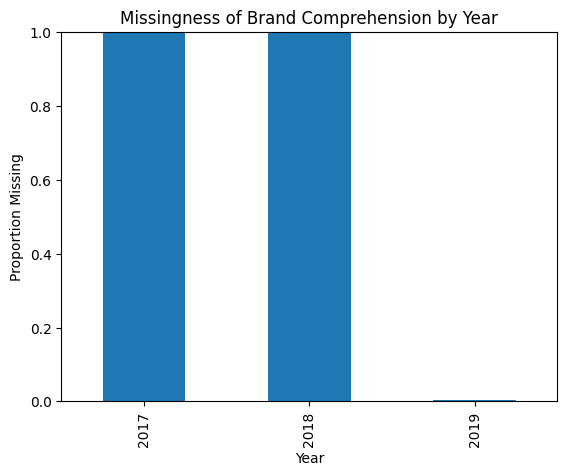

In [272]:
# Visualize missingness in comprehension by year
brand_health_df.groupby('year')['comprehension'].apply(lambda x: x.isna().mean()).plot(kind='bar')
plt.title("Missingness of Brand Comprehension by Year")
plt.ylabel("Proportion Missing")
plt.xlabel("Year")
plt.ylim(0, 1)
plt.show()

##### Relabel 'compehension' values

In [273]:
# Relabel comprehension levels
brand_comprehension_mapping = {
    "None": "No Response",
    "Know a little": "Aware",
    "Maybe do not know it": "Unsure",
    "Know it well": "Familiar",
    "Know it very well": "Very Familiar",
    "Do not know it at all": "Not Aware"
}

In [274]:
# Map the comprehension column using the defined mapping
brand_health_df['comprehension'] = brand_health_df['comprehension'].map(brand_comprehension_mapping)


#### **Find Missing Pattern of 'brand likability'**

In [275]:
# Check for missing values  
groups = ['city', 'year', 'brand','segmentation']
for group in groups:
    no_rate = brand_health_df.groupby(group)['trial'].apply(lambda x: (x == 'No').mean())
    print("\n")
    print(no_rate)




city
Cần Thơ        0.258434
Hà Nội         0.333378
Hải Phòng      0.321724
Hồ Chí Minh    0.480299
Nha Trang      0.229366
Đà Nẵng        0.328956
Name: trial, dtype: float64


year
2017    0.387021
2018    0.320856
2019    0.393247
Name: trial, dtype: float64


brand
Aha Cafe                                         0.178726
BonPas                                           0.433544
Cheese Coffee                                    0.739837
Coffee Bean & Tea Leaf                           0.697816
Cộng Cà Phê                                      0.426317
Effoc                                            0.657505
Gong Cha                                         0.626263
Highlands Coffee                                 0.301526
Independent Cafe                                 0.050423
KOI cafe                                         0.632911
Laha Coffee                                      0.900000
Long Cafe                                        0.512676
Maxx Coffee                    

##### Visualize Missingness of Brand Likability and Daily by Year



city
Cần Thơ        0.890028
Hà Nội         0.997436
Hải Phòng      0.985968
Hồ Chí Minh    0.973660
Nha Trang      0.939835
Đà Nẵng        0.929853
Name: daily, dtype: float64


year
2017    0.953392
2018    0.970498
2019    0.973463
Name: daily, dtype: float64


brand
Aha Cafe                                         1.000000
BonPas                                           1.000000
Cheese Coffee                                    1.000000
Coffee Bean & Tea Leaf                           0.998786
Cộng Cà Phê                                      0.999745
Effoc                                            1.000000
Gong Cha                                         1.000000
Highlands Coffee                                 0.991080
Independent Cafe                                 0.824807
KOI cafe                                         0.995781
Laha Coffee                                      1.000000
Long Cafe                                        0.987324
Maxx Coffee                    

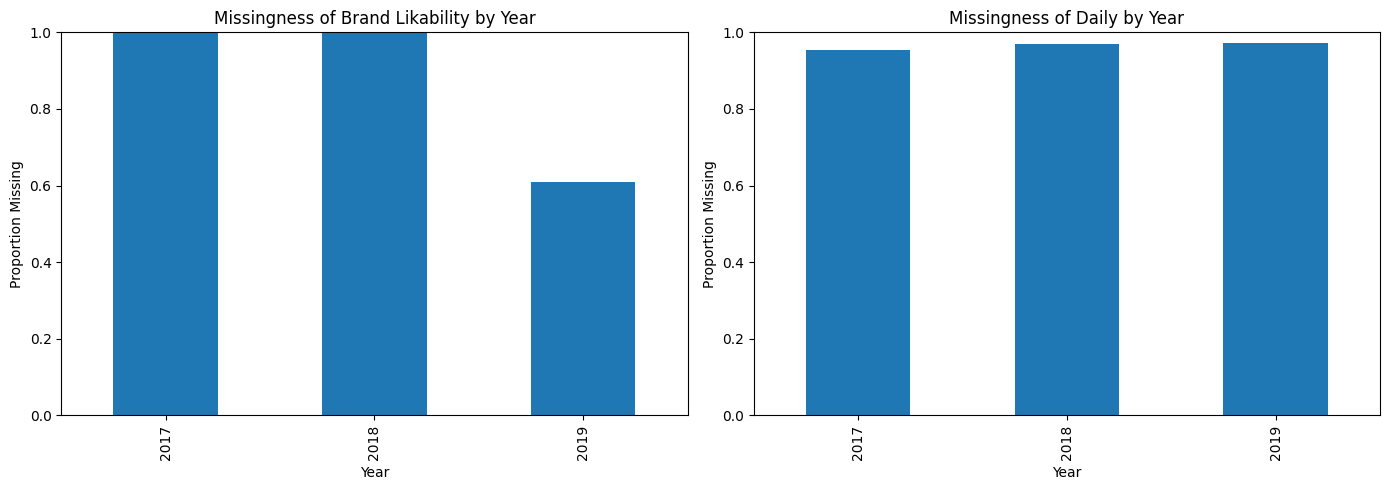

In [276]:
# Check for missing values  
groups = ['city', 'year', 'brand','segmentation']
for group in groups:
    no_rate = brand_health_df.groupby(group)['daily'].apply(lambda x: (x == 'No').mean())
    print("\n")
    print(no_rate)

# Visualize the abnormally high "No" rate in brand_likability
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
brand_health_df.groupby('year')['brand_likability'].apply(lambda x: (x == 'No').mean()).plot(kind='bar', ax=axes[0])
axes[0].set_title("Missingness of Brand Likability by Year")
axes[0].set_ylabel("Proportion Missing")
axes[0].set_xlabel("Year")
axes[0].set_ylim(0, 1)

brand_health_df.groupby('year')['daily'].apply(lambda x: (x == 'No').mean()).plot(kind='bar', ax=axes[1])
axes[1].set_title("Missingness of Daily by Year")
axes[1].set_ylabel("Proportion Missing")
axes[1].set_xlabel("Year")
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

#### **Find Missing Patterns of 'segmentation', 'spending', 'ppa'**

##### Visualize Missingness of Brand Segmentation by Year



city
Cần Thơ        0.757022
Hà Nội         0.832869
Hải Phòng      0.780631
Hồ Chí Minh    0.856494
Nha Trang      0.609687
Đà Nẵng        0.808670
Name: segmentation, dtype: float64


year
2017    1.000000
2018    0.710831
2019    0.777824
Name: segmentation, dtype: float64


brand
Aha Cafe                                         0.736501
BonPas                                           0.876582
Cheese Coffee                                    0.951220
Coffee Bean & Tea Leaf                           0.990291
Cộng Cà Phê                                      0.868923
Effoc                                            0.964059
Gong Cha                                         1.000000
Highlands Coffee                                 0.768662
Independent Cafe                                 1.000000
KOI cafe                                         1.000000
Laha Coffee                                      1.000000
Long Cafe                                        0.925352
Maxx Coffee      

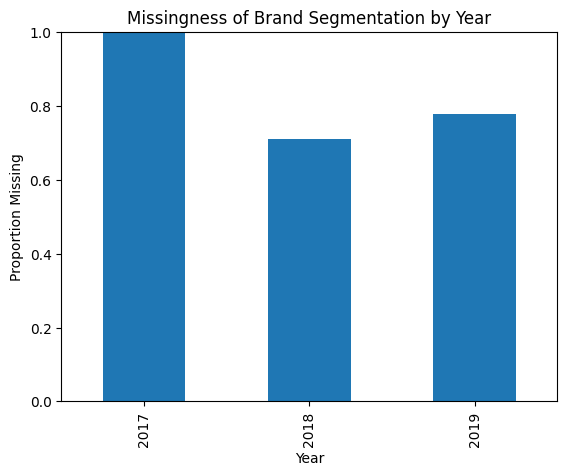

In [277]:
# Check for missing values  
groups = ['city', 'year', 'brand']
for group in groups:
    no_rate = brand_health_df.groupby(group)['segmentation'].apply(lambda x: x.isna().mean())
    print("\n")
    print(no_rate)
# Visualize missingness in segmentation by year
brand_health_df.groupby('year')['segmentation'].apply(lambda x: x.isna().mean()).plot(kind='bar')
plt.title("Missingness of Brand Segmentation by Year")
plt.ylabel("Proportion Missing")
plt.xlabel("Year")
plt.ylim(0, 1)
plt.show()

#### **Fill NA in 'segmentation', 'spending', 'ppa' with Existed Data in 'segmentation_2017_df'**

##### Join Tables on 'id' and 'brand_type'

In [278]:
# Create brand_type column
street = brand_health_df['brand'].str.lower().str.contains('street')
independent = brand_health_df['brand'].str.lower().str.contains('independent|other')
chain = ~(street | independent)

brand_health_df['brand_type'] = np.select(
    [street, independent, chain],
    ['Street', 'Independent', 'Chain'],
    default='Other'
)

print(brand_health_df['brand_type'].unique())


['Chain' 'Street' 'Independent']


In [279]:
# Rename column
brand_health_df = brand_health_df.rename(columns={'fre_visit': 'visit'})

In [280]:
# Since segmentation, spending and ppa are completely missing in 2017, we will use segmentation_2017_df to fill in the missing values
# Merge brand_health_df with segmentation_2017_df to get segmentation, spending and ppa columns
# Perform a left join to bring in segmentation data
merged_df = brand_health_df.merge(
    segmentation_2017_df[['id', 'brand_type', 'segmentation', 'spending', 'ppa', 'visit']],
    on=['id', 'brand_type'],
    how='left',
    suffixes=('', '_from_2017')  # To differentiate columns
)

# 2) Fill only for year 2017, only where left is NaN, and only if the right has a value
mask_2017 = merged_df['year'].eq(2017)

for col in ['segmentation', 'spending', 'ppa', 'visit']:
    src = f'{col}_from_2017'
    to_fill = mask_2017 & merged_df['visit'].notna() & merged_df[col].isna() & merged_df[src].notna()
    merged_df.loc[to_fill, col] = merged_df.loc[to_fill, src]

# Drop the extra columns from segmentation_2017_df
merged_df = merged_df.drop(columns=[f'{col}_from_2017' for col in ['segmentation', 'spending', 'ppa', 'visit']])

In [281]:
# Overwrite brand_health_df with merged_df
brand_health_df = merged_df

#### **Check Missingness After Imputation**

In [282]:
# Missingness summary
miss_summary = (
    merged_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(merged_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values After Imputation:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values After Imputation:
                  Number of Missing  Percentage of Missing
Column                                                    
spending_use                  60346                  81.09
segmentation                  55188                  74.16
spending                      55188                  74.16
ppa                           55188                  74.16
visit                         55087                  74.02
nps_p3m                       52814                  70.97
nps_p3m_group                 52814                  70.97
comprehension                 48073                  64.60
brand                             0                   0.00
city                              0                   0.00
year                              0                   0.00
id                                0                   0.00
daily                             0                   0.00
weekly                            0                   0.00
brand_

#### **Table Formatting**

In [283]:
# Drop redundant columns, rename columns, and reorder columns
redundant_columns = ['brand_type', 'spending_use']
brand_health_df = brand_health_df.drop(columns=redundant_columns, errors='ignore')

## **Companion Table**

**Description:** Table contains information on the typical companion type (e.g., friends, family, alone) customers have when visiting coffee shops.

**Key Summary:** No error is found.


In [284]:
#Describe data distribution and data type
print(companion_df.head())
print("-" * 50)
print(companion_df.describe())
print("-" * 50)
print(companion_df.info())

      id         city         companion_group  year
0  89100  Hồ Chí Minh  Boyfriend / Girlfriend  2017
1  89100  Hồ Chí Minh                 Friends  2017
2  89101  Hồ Chí Minh                  Family  2017
3  89101  Hồ Chí Minh                 Friends  2017
4  89102  Hồ Chí Minh                 Friends  2017
--------------------------------------------------
                  id          year
count   20739.000000  20739.000000
mean   465470.813540   2018.050822
std    272266.066681      0.794681
min     89100.000000   2017.000000
25%    138826.000000   2017.000000
50%    439750.000000   2018.000000
75%    790252.000000   2019.000000
max    863754.000000   2019.000000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20739 entries, 0 to 20738
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               20739 non-null  int64 
 1   city             20739 

In [285]:
# Check unique values in columns
for column_name in companion_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(companion_df[column_name].unique())
    print("\n")

Unique values in column 'id':
[ 89100  89101  89102 ... 862137 862458 863754]


Unique values in column 'city':
['Hồ Chí Minh' 'Cần Thơ' 'Hà Nội' 'Hải Phòng' 'Đà Nẵng' 'Nha Trang']


Unique values in column 'companion_group':
['Boyfriend / Girlfriend' 'Friends' 'Family'
 'Colleagues / Business partner' 'Alone' 'Others']


Unique values in column 'year':
[2017 2018 2019]




In [286]:
# Missingness summary,
miss_summary = (
    companion_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(companion_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                 Number of Missing  Percentage of Missing
Column                                                   
id                               0                    0.0
city                             0                    0.0
companion_group                  0                    0.0
year                             0                    0.0


In [287]:
# Count unique values in companion_group
companion_df['companion_group'].value_counts()

companion_group
Friends                          9663
Family                           5924
Colleagues / Business partner    2934
Alone                            1473
Boyfriend / Girlfriend            718
Others                             27
Name: count, dtype: int64

## **Competitor Data for Filter Table**

**Description:** Table contains the number of physical store locations for each coffee brand by city and year, used to assess market presence and competitive density.

**Key Summary:** No error is found.

In [288]:
#Describe data distribution and data type
print(competitor_data_for_filter_df.head())
print("-" * 50)
print(competitor_data_for_filter_df.describe())
print("-" * 50)
print(competitor_data_for_filter_df.info())

   no_        brand        city  year  store_count
0    6  Cộng Cà Phê   Hải Phòng  2017            1
1    9  Cộng Cà Phê     Lào Cai  2017            1
2   10  Cộng Cà Phê   Nha Trang  2017            1
3   11  Cộng Cà Phê   Quảng Nam  2017            1
4   12  Cộng Cà Phê  Quảng Ninh  2017            1
--------------------------------------------------
              no_         year  store_count
count  234.000000   234.000000   234.000000
mean   117.500000  2018.000000     7.435897
std     67.694165     0.818247    17.220800
min      1.000000  2017.000000     0.000000
25%     59.250000  2017.000000     1.000000
50%    117.500000  2018.000000     1.000000
75%    175.750000  2019.000000     4.000000
max    234.000000  2019.000000   113.000000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   no_  

In [289]:
# Check unique values in columns
for column_name in competitor_data_for_filter_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(competitor_data_for_filter_df[column_name].unique())
    print("\n")

Unique values in column 'no_':
[  6   9  10  11  12  13  26  28  32  34  41  50  58  68  71  72  77  82
  84  86  87  88  89  90  92  94  96 104 105 106 109 112 115 124 126 128
 132 133 140 143 144 145 149 150 151 155 157 160 164 165 166 167 168 170
 171 172 182 183 184 187 190 193 196 198 202 210 218 220 221 223 227 228
 229 233   1   2   3   4   5   7   8  14  15  16  17  18  19  20  21  22
  23  24  25  27  29  30  31  33  35  36  37  38  39  40  42  43  44  45
  46  47  48  49  51  52  53  54  55  56  57  59  60  61  62  63  64  65
  66  67  69  70  73  74  75  76  78  79  80  81  83  85  91  93  95  97
  98  99 100 101 102 103 107 108 110 111 113 114 116 117 118 119 120 121
 122 123 125 127 129 130 131 134 135 136 137 138 139 141 142 146 147 148
 152 153 154 156 158 159 161 162 163 169 173 174 175 176 177 178 179 180
 181 185 186 188 189 191 192 194 195 197 199 200 201 203 204 205 206 207
 208 209 211 212 213 214 215 216 217 219 222 224 225 226 230 231 232 234]


Unique values in 

In [290]:
# Missingness summary,
miss_summary = (
    competitor_data_for_filter_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(competitor_data_for_filter_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
             Number of Missing  Percentage of Missing
Column                                               
no_                          0                    0.0
brand                        0                    0.0
city                         0                    0.0
year                         0                    0.0
store_count                  0                    0.0


## **Day of Week**

**Description:** Table contains data on which days of the week consumers typically visit coffee shops, including visit frequency and weekday/weekend classification.

**Key Summary:** 

1. Given missing rate of 'visit_dayofweek', 'dayofweek' < 5%, these columns are imputed by median to ensure data consistency.


In [291]:
#Describe data distribution and data type
print(day_of_week_df.head())
print("-" * 50)
print(day_of_week_df.describe())
print("-" * 50)
print(day_of_week_df.info())

      id         city dayofweek  visit_dayofweek  year weekday_end
0  89100  Hồ Chí Minh    Monday              2.0  2017    Weekdays
1  89100  Hồ Chí Minh  Thursday              2.0  2017    Weekdays
2  89100  Hồ Chí Minh  Saturday              2.0  2017    Weekends
3  89100  Hồ Chí Minh    Friday              2.0  2017    Weekdays
4  89100  Hồ Chí Minh    Sunday              4.0  2017    Weekends
--------------------------------------------------
                  id  visit_dayofweek          year
count   39095.000000     39041.000000  39095.000000
mean   449655.770994         3.552932   2018.006599
std    270582.014165         1.940105      0.791710
min     89100.000000         1.000000   2017.000000
25%    138476.000000         2.000000   2017.000000
50%    433724.000000         4.000000   2018.000000
75%    781425.500000         4.000000   2019.000000
max    863754.000000        36.000000   2019.000000
--------------------------------------------------
<class 'pandas.core.frame.Da

In [292]:
# Check unique values in columns
for column_name in day_of_week_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(day_of_week_df[column_name].unique())
    print("\n")

Unique values in column 'id':
[ 89100  89101  89102 ... 862137 862458 863754]


Unique values in column 'city':
['Hồ Chí Minh' 'Cần Thơ' 'Hà Nội' 'Hải Phòng' 'Đà Nẵng' 'Nha Trang']


Unique values in column 'dayofweek':
['Monday' 'Thursday' 'Saturday' 'Friday' 'Sunday' 'Tuesday' 'Wednesday'
 None]


Unique values in column 'visit_dayofweek':
[ 2.  4.  1.  3.  8.  5.  6. 10. 16. 14.  7. 12. 36.  9. nan 18. 15. 11.
 20. 17. 30. 25. 13. 35. 21. 23. 22.]


Unique values in column 'year':
[2017 2018 2019]


Unique values in column 'weekday_end':
['Weekdays' 'Weekends' None]




### **Handle Missing Value**

In [293]:
# Missingness summary
miss_summary = (
    day_of_week_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(day_of_week_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                 Number of Missing  Percentage of Missing
Column                                                   
weekday_end                     86                   0.22
dayofweek                       86                   0.22
visit_dayofweek                 54                   0.14
id                               0                   0.00
city                             0                   0.00
year                             0                   0.00


#### **Impute 'visit_dayofweek' by Median**

In [294]:
# Impute visit_dayofweek column with median from day_of_week_df
# Calculate median of visit_dayofweek for each group of city, year, and dayofweek

median_by_group = day_of_week_df.groupby(['city', 'year', 'dayofweek'], dropna=True)['visit_dayofweek'].transform('median')

day_of_week_df['visit_dayofweek_imputed'] = day_of_week_df['visit_dayofweek'].fillna(median_by_group)

print("Missing before:", day_of_week_df['visit_dayofweek'].isna().sum())
print("Missing after :", day_of_week_df['visit_dayofweek_imputed'].isna().sum())

Missing before: 54
Missing after : 0


In [295]:
#Overwrite visit_dayofweek with visit_dayofweek_imputed
day_of_week_df['visit_dayofweek'] = day_of_week_df['visit_dayofweek_imputed']

#### **Impute 'dayofweek' by Mode**

In [296]:
# Impute dayofweek column with mode
# Calculate mode of dayofweek for each group of city, year, and visit_dayofweek
mode_by_group = day_of_week_df.groupby(['city','year','visit_dayofweek'], dropna=True)['dayofweek'].transform(
    lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan
)
day_of_week_df['dayofweek_imputed'] = day_of_week_df['dayofweek'].fillna(mode_by_group)

print(f"Missing values before imputation: {day_of_week_df['dayofweek'].isna().sum()}")
print(f"Missing values after imputation: {day_of_week_df['dayofweek_imputed'].isna().sum()}\n")

Missing values before imputation: 86
Missing values after imputation: 0



In [297]:
# Overwrite dayofweek with dayofweek_imputed
day_of_week_df['dayofweek'] = day_of_week_df['dayofweek_imputed']

#### **Categorize 'weekday_end'**

In [298]:
# If dayofweek is Saturday or Sunday, fill missing weekday_end with "Weekends", otherwise "Weekdays"
day_of_week_df['imputed_weekday_end'] = np.where(
    day_of_week_df['dayofweek'].isin(['Saturday', 'Sunday']),
    'Weekends',
    'Weekdays'
)

print(f"Missing values before imputation: {day_of_week_df['weekday_end'].isna().sum()}")
print(f"Missing values after imputation: {day_of_week_df['imputed_weekday_end'].isna().sum()}\n")

Missing values before imputation: 86
Missing values after imputation: 0



In [299]:
# Overwrite weekday_end with imputed_weekday_end
day_of_week_df['weekday_end'] = day_of_week_df['imputed_weekday_end']

#### **Check Missingness After Imputation**

In [300]:
# Missingness summary
miss_summary = (
    day_of_week_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(day_of_week_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                         Number of Missing  Percentage of Missing
Column                                                           
id                                       0                    0.0
city                                     0                    0.0
dayofweek                                0                    0.0
visit_dayofweek                          0                    0.0
year                                     0                    0.0
weekday_end                              0                    0.0
visit_dayofweek_imputed                  0                    0.0
dayofweek_imputed                        0                    0.0
imputed_weekday_end                      0                    0.0


### **Table Formatting**

In [301]:
# Drop visit_daypart_imputed column
day_of_week_df = day_of_week_df.drop(columns=['visit_dayofweek_imputed', 'dayofweek_imputed', 'imputed_weekday_end'], errors='ignore')

## **Daypart**

**Description:** Table contains data on customer visit frequency by time of day, helping to identify peak hours for coffee shop visits across different cities and years.

**Key Summary:** 

1. Given missing rate of 'visit_daypart', 'daypart' < 5%, these columns are imputed by median to ensure data consistency.

In [302]:
#Describe data distribution and data type
print(day_part_df.head())
print("-" * 50)
print(day_part_df.describe())
print("-" * 50)
print(day_part_df.info())

      id         city              daypart  visit_daypart  year
0  89100  Hồ Chí Minh   5 PM - before 9 PM            4.0  2017
1  89100  Hồ Chí Minh  11 AM - before 2 PM            2.0  2017
2  89100  Hồ Chí Minh   2 PM - before 5 PM            2.0  2017
3  89100  Hồ Chí Minh        9 PM or later            4.0  2017
4  89101  Hồ Chí Minh   5 PM - before 9 PM            1.0  2017
--------------------------------------------------
                  id  visit_daypart          year
count   19189.000000   18342.000000  19189.000000
mean   454165.151128       6.947116   2018.017093
std    275768.320860       7.717883      0.807782
min     89100.000000       1.000000   2017.000000
25%    138433.000000       2.000000   2017.000000
50%    436161.000000       4.000000   2018.000000
75%    786912.000000       8.000000   2019.000000
max    863754.000000      60.000000   2019.000000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19189 entries,

In [303]:
# Check unique values in columns
for column_name in day_part_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(day_part_df[column_name].unique())
    print("\n")

Unique values in column 'id':
[ 89100  89101  89102 ... 862137 862458 863754]


Unique values in column 'city':
['Hồ Chí Minh' 'Cần Thơ' 'Hà Nội' 'Hải Phòng' 'Đà Nẵng' 'Nha Trang']


Unique values in column 'daypart':
['5 PM - before 9 PM' '11 AM - before 2 PM' '2 PM - before 5 PM'
 '9 PM or later' 'Before 9 AM' '9 AM - before 11 AM' None]


Unique values in column 'visit_daypart':
[ 4.  2.  1.  3. 10. 20.  8.  5.  6.  7. 17. 13. 12. 30. 24. 15.  9. 16.
 14. 25. 22. 11. 28. 27. nan 40. 26. 18. 60. 45. 29. 23. 19. 21. 35. 38.
 31. 34. 48. 43.]


Unique values in column 'year':
[2017 2018 2019]




### **Handle Missing Values**

In [304]:
# Missingness summary
miss_summary = (
    day_part_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(day_part_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
               Number of Missing  Percentage of Missing
Column                                                 
visit_daypart                847                   4.41
daypart                       13                   0.07
id                             0                   0.00
city                           0                   0.00
year                           0                   0.00


#### **Impute 'visit_daypart' by Median**

In [305]:
# Impute visit_daypart column with median
# Calculate median of visit_daypart for each group of city, year, and daypart

median_by_group = day_part_df.groupby(['city', 'year', 'daypart'], dropna=True)['visit_daypart'].transform('median')

day_part_df['visit_daypart_imputed'] = day_part_df['visit_daypart'].fillna(median_by_group)

print("Missing before:", day_part_df['visit_daypart'].isna().sum())
print("Missing after :", day_part_df['visit_daypart_imputed'].isna().sum())


Missing before: 847
Missing after : 0


In [306]:
# Overwrite visit_daypart with visit_daypart_imputed
day_part_df['visit_daypart'] = day_part_df['visit_daypart_imputed']

#### **Impute 'daypart' by Mode**

In [307]:
# Impute daypart column with mode
# Calculate mode of daypart for each group of city, year, and visit_daypart
mode_by_group = day_part_df.groupby(['city','year','visit_daypart'], dropna=True)['daypart'].transform(
    lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan
)
day_part_df['daypart_imputed'] = day_part_df['daypart'].fillna(mode_by_group)

print(f"Missing values before imputation: {day_part_df['daypart'].isna().sum()}")
print(f"Missing values after imputation: {day_part_df['daypart_imputed'].isna().sum()}\n")

Missing values before imputation: 13
Missing values after imputation: 0



In [308]:
# Overwrite daypart with daypart_imputed
day_part_df['daypart'] = day_part_df['daypart_imputed']

#### **Check Missingness After Imputation**

In [309]:
# Missingness summary
miss_summary = (
    day_part_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(day_part_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                       Number of Missing  Percentage of Missing
Column                                                         
id                                     0                    0.0
city                                   0                    0.0
daypart                                0                    0.0
visit_daypart                          0                    0.0
year                                   0                    0.0
visit_daypart_imputed                  0                    0.0
daypart_imputed                        0                    0.0


### **Table Formatting**

In [310]:
# Drop visit_daypart_imputed column
day_part_df = day_part_df.drop(columns=['visit_daypart_imputed', 'daypart_imputed'], errors='ignore')

## **Need State Table**

**Description:** Table captures consumer need states linked to time of day or day-level behaviors, providing insights into why customers visit coffee shops at specific times.

**Key Summary:** No error is found.

In [311]:
#Describe data distribution and data type
print(need_state_df.head())
print("-" * 50)
print(need_state_df.describe())
print("-" * 50)
print(need_state_df.info())

      id         city  year  \
0  89100  Hồ Chí Minh  2017   
1  89100  Hồ Chí Minh  2017   
2  89100  Hồ Chí Minh  2017   
3  89100  Hồ Chí Minh  2017   
4  89100  Hồ Chí Minh  2017   

                                          needstates day_daypart  \
0                                       Drinking tea     Overall   
1  Enterntainment (watching movies. Playing games...     Overall   
2                                    Drinking coffee     Overall   
3                               Drinking ice-blended     Overall   
4                                         Socialzing     Overall   

            needstate_group  
0        Drinking beverages  
1  Relaxing & entertainment  
2        Drinking beverages  
3        Drinking beverages  
4               Socializing  
--------------------------------------------------
                  id          year
count   75251.000000  75251.000000
mean   631898.211293   2018.520246
std    257218.326951      0.737058
min     89100.000000   2017.00000

In [312]:
# Check unique values in columns
for column_name in need_state_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(need_state_df[column_name].unique())
    print("\n")

Unique values in column 'id':
[ 89100  89101  89102 ... 862137 862458 863754]


Unique values in column 'city':
['Hồ Chí Minh' 'Cần Thơ' 'Hà Nội' 'Hải Phòng' 'Đà Nẵng' 'Nha Trang']


Unique values in column 'year':
[2017 2018 2019]


Unique values in column 'needstates':
['Drinking tea'
 'Enterntainment (watching movies. Playing games, browsing web,…)'
 'Drinking coffee' 'Drinking ice-blended' 'Socialzing'
 'Drinking other beverages (excluding tea, coffee, freeze)'
 'Studying / Reading books' 'Relaxing (Alone)' 'Have snack / pastry'
 'Have meals (breakfast / lunch / dinner)' 'Working / Business meeting'
 'Socializing with family / relatives' 'Socializing with friends'
 'Socializing with colleagues' 'Other']


Unique values in column 'day_daypart':
['Overall' 'Before 9 AM' 'Weekends' '2 PM - before 5 PM' 'Weekdays'
 '9 PM or later' '5 PM - before 9 PM' '9 AM - before 11 AM'
 '11 AM - before 2 PM']


Unique values in column 'needstate_group':
['Drinking beverages' 'Relaxing & entertainme

In [313]:
# Missingness summary
miss_summary = (
    need_state_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(need_state_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
print(miss_summary.sort_values("Number of Missing", ascending=False))

Summary Table of Missing Values:
                 Number of Missing  Percentage of Missing
Column                                                   
id                               0                    0.0
city                             0                    0.0
year                             0                    0.0
needstates                       0                    0.0
day_daypart                      0                    0.0
needstate_group                  0                    0.0


# **Data Modelling**

When reviewing brand_health_df tables, I noticed that the data is structured as responses to multiple-choice checkbox questions.

 - Each respondent (id) could evaluate more than one brand.

 - As a result, a single respondent appears in multiple rows, with each row capturing their evaluation of a different brand.

 - For example, in the screenshot, respondent id = 89100 in Hồ Chí Minh (2017) evaluated several brands such as Trung Nguyên, Gong Cha, The Coffee Factory, Independent Café, etc. Instead of one row containing multiple answers, the dataset records one row per brand evaluated.

Table brand_image_df also captures the multiple-choice checkbox answers, evaluating attributes associated with the specific brands in brand_health_df.

**Data modelling idea:** Based on the structure of the data, I have an idea to connect these tables:
1. I regard each row in brand_health_df is a individual answer of a respondent. Therefore, I create a 'answer_index' column in brand_health_df starting at 1 to represent the answer.
2. 'answer_index' will be merged to brand_image_df on 'id' and 'brand'.


In [314]:
# Create 'answer_index' in brand_health_df starting from 1
brand_health_df['answer_index'] = range(1, len(brand_health_df) + 1)

In [315]:
# Merge brand_image_df with brand_health_df to get answer_index
merged_df = brand_image_df.merge(
    brand_health_df[['id', 'brand', 'answer_index']].rename(columns={'brand': 'brand_health'}),
    left_on=['id', 'brand_image'],          # match on brand_image.id & brand_image.brand
    right_on=['id', 'brand_health'],  # match against brand_health.id & renamed brand
    how='left'
)


In [316]:
# Check missingness by group
groups = ['city', 'year', 'brand_image']
for group in groups:
    no_rate = merged_df.groupby(group)['answer_index'].apply(lambda x: x.isna().mean())
    print("\n")
    print(no_rate)



city
Cần Thơ        0.150742
Hà Nội         0.064017
Hải Phòng      0.117784
Hồ Chí Minh    0.056732
Nha Trang      0.127901
Đà Nẵng        0.077574
Name: answer_index, dtype: float64


year
2017    0.000000
2018    0.000000
2019    0.213663
Name: answer_index, dtype: float64


brand_image
Aha Cafe                                         0.0
BonPas                                           0.0
Cheese Coffee                                    0.0
Coffee Bean & Tea Leaf                           0.0
Cộng Cà Phê                                      0.0
Effoc                                            0.0
Gong Cha                                         0.0
Highlands Coffee                                 0.0
Independent Cafe                                 0.0
KOI cafe                                         0.0
Laha Coffee                                      0.0
Long Cafe                                        0.0
Maxx Coffee                                      0.0
Milano            

In [317]:
# Check missing answer_index after imputation
missing_answer_index = merged_df[merged_df['answer_index'].isna()]
print(f"Number of rows with missing answer_index after imputation: {len(missing_answer_index)}")

Number of rows with missing answer_index after imputation: 51788


## **Handle Label Error in the Year 2019**

Because "Other" brands are not used in the brand analysis, 

In [318]:
# Check unique values containing "Other" of brand in brand_image_df and brand_health_df in 2019
print("Unique values containing 'Other' in brand_image_df:")
print(brand_image_df[(brand_image_df['year'] == 2019) & (brand_image_df['brand_image'].str.contains('Other', case=False, na=False))]['brand_image'].unique())
print("\n")
print("Unique values containing 'Other' in brand_health_df:")
print(brand_health_df[(brand_health_df['year'] == 2019) & (brand_health_df['brand'].str.contains('Other', case=False, na=False))]['brand'].unique())

Unique values containing 'Other' in brand_image_df:
['Other']


Unique values containing 'Other' in brand_health_df:
['Other 1' 'Other 2' 'Other 3']


In [319]:
# Count how many times an id has Other in brand
other_brand_counts = brand_health_df[(brand_health_df['year'] == 2019) & (brand_health_df['brand'].str.contains('Other', case=False, na=False))].groupby('id').size()
print("Counts of 'Other' brand occurrences by ID:")
print(other_brand_counts)

Counts of 'Other' brand occurrences by ID:
id
709124    2
709345    1
724325    1
724898    1
724930    3
         ..
859707    3
860708    2
860742    2
862137    2
863754    2
Length: 2304, dtype: int64


### **Replace Actual Brand Labels for IDs with one "Other" brand**

In [320]:
# 1. Create a mapping of id and "Other" brand from brand_health_df
other_brand_mapping_1 = (
    brand_health_df
    .loc[
        (brand_health_df['year'] == 2019) &
        (brand_health_df['brand'].str.contains('Other', case=False, na=False))
    , ['id', 'brand']]
    .groupby('id')['brand']
    .first()                #  Get the first occurrence
)

# 2. Filter the mapping to include only ids with exactly one "Other" brand
ids_with_one_other = other_brand_counts[other_brand_counts == 1].index
other_brand_mapping_1 = other_brand_mapping_1.loc[ids_with_one_other]

# 3. Replace "Other" in brand_image_df for these ids
brand_image_df.loc[
    (brand_image_df['id'].isin(ids_with_one_other)) &
    (brand_image_df['brand_image'].str.contains('Other', case=False, na=False)),
    'imputed_brand_image'
] = brand_image_df['id'].map(other_brand_mapping_1)

### **Replace Actual Brand Labels for IDs with multiple "Other" brand**

In [321]:
# 1. Filter the mapping 
other_brand_mapping_multiple = (
    brand_health_df
    .loc[
        (brand_health_df['year'] == 2019) &
        (brand_health_df['brand'].str.contains('Other', case=False, na=False))
    , ['id', 'brand']]
)

# 2. Filter ids with more than one "Other" brand
ids_with_multiple_others = other_brand_counts[other_brand_counts > 1].index
other_brand_mapping_multiple = other_brand_mapping_multiple.loc[other_brand_mapping_multiple['id'].isin(ids_with_multiple_others)].sort_values(by=['id', 'brand'])

# 3. Rank each unique values in 'brand' in other_brand_mapping_multiple partitioned by 'id'
other_brand_mapping_multiple['rank'] = other_brand_mapping_multiple.groupby('id').cumcount() + 1

# 4. Rank each unique values in 'attribute' in brand_image_df partitioned by 'id'
brand_image_df['rank'] = np.nan  # Initialize rank column with NaN

brand_image_df['rank'] = (
    brand_image_df
    .loc[
    (brand_image_df['year'] == 2019) & 
    (brand_image_df['brand_image'].str.contains("Other", case=False, na=False))
    ]
    .groupby(['id', 'attribute'])
    .cumcount() + 1
)

In [322]:
# Create a dictionary to map (id, rank) to brand
brand_dict = (
    other_brand_mapping_multiple[['id', 'rank', 'brand']]
    .set_index(['id', 'rank'])['brand']
    .to_dict()
)

# Function to impute imputed_brand_image based on (id, rank)
def impute_brand_image(row):
    if pd.isna(row['imputed_brand_image']) and not pd.isna(row['rank']):
        return brand_dict.get((row['id'], row['rank']), np.nan)
    else:
        return row['imputed_brand_image']

# Set targeted subset
mask_multiple = (
    (brand_image_df['year'] == 2019) &
    (brand_image_df['brand_image'].str.contains('Other', case=False, na=False)) &
    (brand_image_df['id'].isin(ids_with_multiple_others))
)

# Apply to dataframe
brand_image_df.loc[mask_multiple, 'imputed_brand_image'] = brand_image_df[mask_multiple].apply(impute_brand_image, axis=1)

In [323]:
# Overwrite brand_image with imputed_brand_image where not null
brand_image_df['brand_image'] = brand_image_df['imputed_brand_image'].fillna(brand_image_df['brand_image'])

In [324]:
# Drop temporary columns
brand_image_df = brand_image_df.drop(columns=['imputed_brand_image', 'rank'], errors='ignore')

### **Merge to Get 'answer_index'**

In [325]:
# Merge brand_image_df with brand_health_df to get answer_index
merged_df = brand_image_df.merge(
    brand_health_df[['id', 'brand', 'answer_index']].rename(columns={'brand': 'brand_health'}),
    left_on=['id', 'brand_image'],          # match on brand_image.id & brand_image.brand
    right_on=['id', 'brand_health'],  # match against brand_health.id & renamed brand
    how='left'
)

In [326]:
# Check missing answer_index after imputation
missing_answer_index = merged_df[merged_df['answer_index'].isna()]
print(f"Number of rows with missing answer_index after imputation: {len(missing_answer_index)}")

Number of rows with missing answer_index after imputation: 0


In [327]:
# Overwrite brand_image_df with merged_df
brand_image_df = merged_df.drop(columns=['brand_health'])

# **Customer Segmentation**

In [428]:
# Create segmentation dataframe from brand_health_df
exclude_columns = ['comprehension', 'brand_likability', 'spontaneous', 'nps_p3m', 'nps_p3m_group', 'answer_index', 'brand_key']
segmentation_df = brand_health_df[[col for col in brand_health_df.columns if col not in exclude_columns]].drop_duplicates()

# Only select rows where brand column is ...
brand_names = ["Highlands Coffee", "The Coffee House", "Trung Nguyên", "Phúc Long", "Starbucks", "Cộng Cà Phê"]
segmentation_df = segmentation_df[segmentation_df['brand'].isin(brand_names)]

# Drop rows where spending is missing
segmentation_df = segmentation_df.dropna(subset=['spending'])

In [429]:
# Create R, F, M scores
# R score is defined by trial, p3m, p1m, weekly, daily columns
# R score: Recency score (the more recent the visit, the higher the score)

# Count number of "Yes" and "No" in trial, p3m, p1m, weekly, daily columns
r_cols = ['trial', 'p3m', 'p1m', 'weekly', 'daily']
segmentation_df[r_cols].apply(lambda x: x.value_counts(), axis=0).transpose()


,No,Yes
trial,2,4584
p3m,2,4584
p1m,1,4585
weekly,2567,2019
daily,4473,113


In [430]:
# Because "No" count in trial and p3m is very low, drop these columns
r_cols = ['p1m', 'weekly', 'daily']
segmentation_df = segmentation_df.drop(columns=['trial', 'p3m'], errors='ignore')

In [431]:
# Set scoring rules for R
def r_score(row):
    score = 1                   # If p1m is "No", then 1
    if row['p1m'] == 'Yes':
        score += 1              # If p1m is "Yes", then 2
    if row['weekly'] == 'Yes':
        score += 1              # If weekly is "Yes", then 3
    if row['daily'] == 'Yes':
        score += 1              # If daily is "Yes", then 4
    return score
segmentation_df['R_score'] = segmentation_df.apply(r_score, axis=1)

Text(0, 0.5, 'Count')

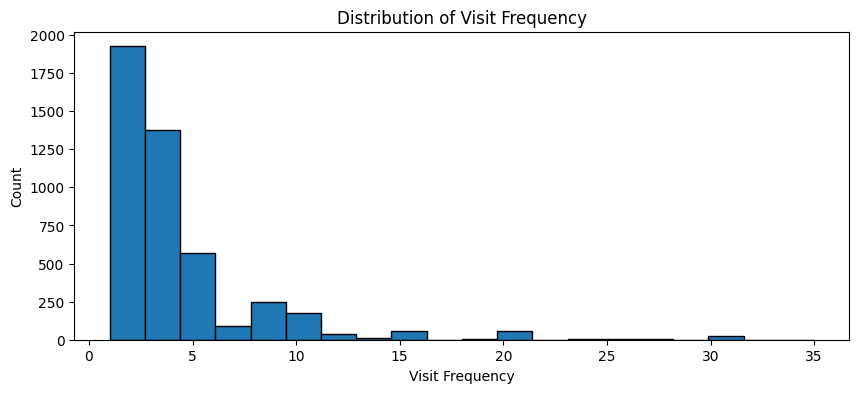

In [432]:
# Plot histogram of visit columnm shwoing graph only
plt.figure(figsize=(10, 4))
plt.title("Distribution of Visit Frequency")
plt.hist(segmentation_df['visit'].dropna(), bins=20, edgecolor='black')
plt.xlabel("Visit Frequency")
plt.ylabel("Count")

In [433]:
# Set scoring rules for F with quantiles
q1 = segmentation_df['visit'].quantile(0.25)
q2 = segmentation_df['visit'].quantile(0.5)
q3 = segmentation_df['visit'].quantile(0.75)
def F_score(visit):
    if pd.isna(visit):
        return np.nan
    elif visit <= q1:
        return 1
    elif visit <= q2:
        return 2
    elif visit <= q3:
        return 3
    else:
        return 4
segmentation_df['F_score'] = segmentation_df['visit'].apply(F_score)

In [434]:
# Use segmentation column to create M score
# Distinct segmentation values
print(segmentation_df['segmentation'].dropna().unique())

['Seg.03 - Premium (VND 60K - VND 99K)'
 'Seg.02 - Mass Asp (VND 25K - VND 59K)' 'Seg.01 - Mass (<VND 25K)'
 'Seg.04 - Super Premium (VND 100K+)']


In [435]:
# Set rules for M score
# Given avg price of a product is 35, we can set the following rules:
def M_score(ppa):
    if pd.isna(ppa):
        return np.nan
    elif ppa <= 35:
        return 1
    elif ppa <= 55:
        return 2
    elif ppa <= 80:
        return 3
    else:
        return 4
segmentation_df['M_score'] = segmentation_df['ppa'].apply(M_score)

In [436]:
# Concat R, F, M scores to create RFM_segment
rfm_cols = ['R_score', 'F_score', 'M_score']
segmentation_df['RFM_segment'] = segmentation_df[rfm_cols].astype(str).agg(''.join, axis=1)


In [437]:
# Count unique values in RFM_segment
print("Counts of RFM_segment values:")
print(segmentation_df['RFM_segment'].value_counts().sort_index())

Counts of RFM_segment values:
RFM_segment
112       1
211     311
212    1146
213     390
214      77
221      90
222     373
223     163
224      16
331     168
332     632
333     230
334      38
341     122
342     478
343     207
344      31
441      36
442      54
443      20
444       3
Name: count, dtype: int64


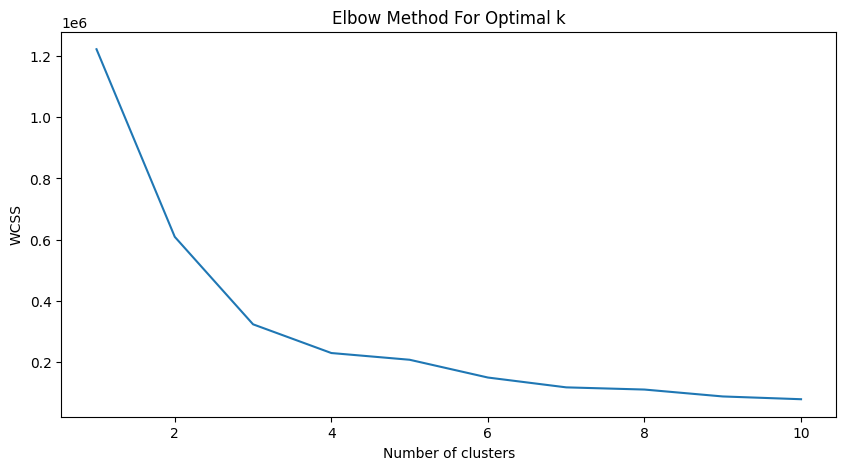

In [438]:
# Conduct k-means clustering on R, F, M scores
# Elbow method to find optimal number of clusters, silhouette score to validate the clusters
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    #kmeans.fit(segmentation_df[['R_score', 'F_score', 'M_score']])
    kmeans.fit(segmentation_df[['R_score', 'visit', 'ppa']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()



In [439]:
# From elbow method, we can choose k=4
kmeans = KMeans(n_clusters=4, random_state=42)
segmentation_df[['R_score', 'visit', 'ppa']] = segmentation_df[['R_score', 'visit', 'ppa']].fillna(0)
segmentation_df['KMeans_segment'] = kmeans.fit_predict(segmentation_df[['R_score', 'visit', 'ppa']])

In [440]:
# Average R,F,M scores by KMeans_segment
avg_scores = segmentation_df.groupby('KMeans_segment')[['R_score', 'F_score', 'M_score']].mean().round(2)
print("Average R, F, M scores by KMeans_segment:")
print(avg_scores)

# Max
max_scores = segmentation_df.groupby('KMeans_segment')[['R_score', 'F_score', 'M_score']].max().round(2)
print("Max R, F, M scores by KMeans_segment:")
print(max_scores)
# Min
min_scores = segmentation_df.groupby('KMeans_segment')[['R_score', 'F_score', 'M_score']].min().round(2)
print("Min R, F, M scores by KMeans_segment:")
print(min_scores)

Average R, F, M scores by KMeans_segment:
                R_score  F_score  M_score
KMeans_segment                           
0                  2.47     2.21     1.52
1                  2.46     2.18     4.00
2                  2.46     2.22     2.24
3                  2.48     2.32     3.02
Max R, F, M scores by KMeans_segment:
                R_score  F_score  M_score
KMeans_segment                           
0                     4        4        2
1                     4        4        4
2                     4        4        3
3                     4        4        4
Min R, F, M scores by KMeans_segment:
                R_score  F_score  M_score
KMeans_segment                           
0                     1        1        1
1                     2        1        4
2                     2        1        2
3                     2        1        3


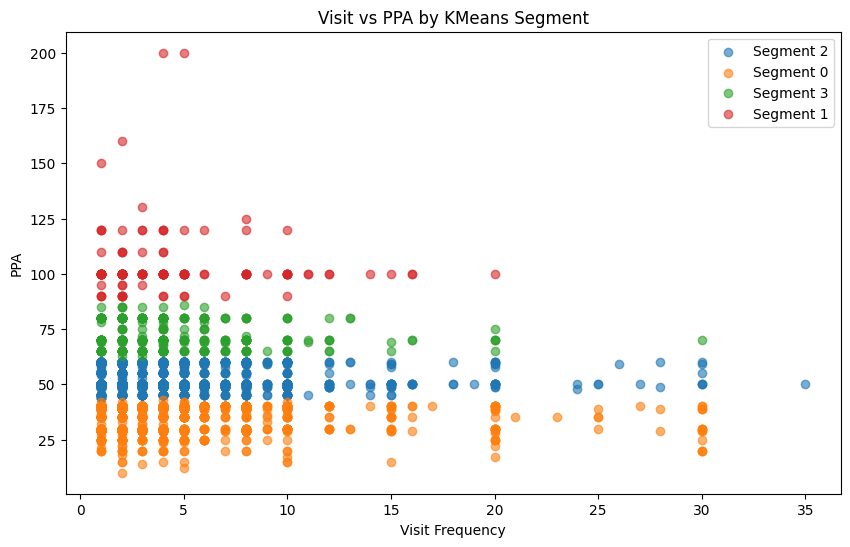

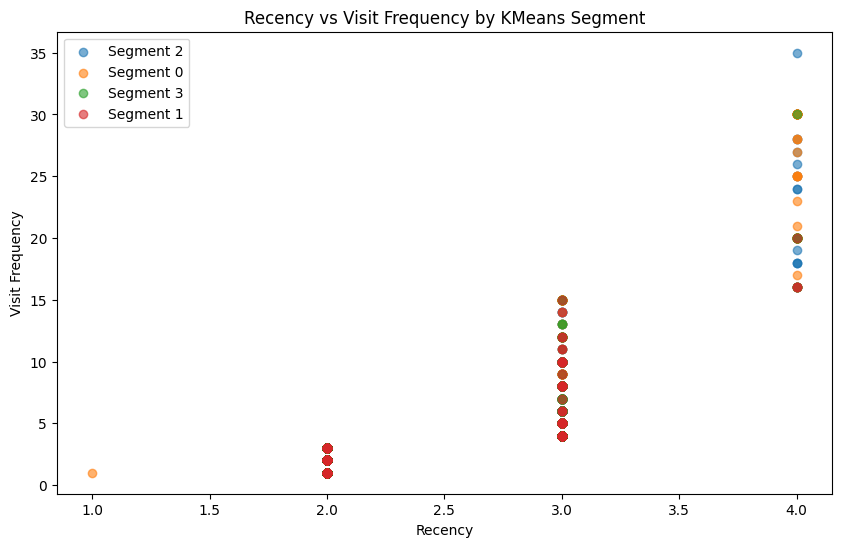

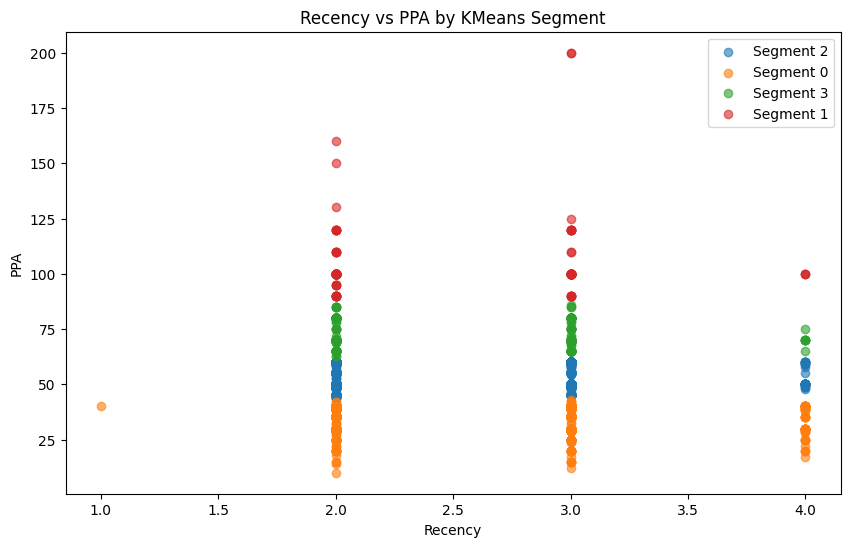

In [441]:
# Scatter plot of visit and ppa colored by KMeans_segment
plt.figure(figsize=(10, 6))
for segment in segmentation_df['KMeans_segment'].unique():
    subset = segmentation_df[segmentation_df['KMeans_segment'] == segment]
    plt.scatter(subset['visit'], subset['ppa'], label=f'Segment {segment}', alpha=0.6)
plt.title("Visit vs PPA by KMeans Segment")
plt.xlabel("Visit Frequency")
plt.ylabel("PPA")
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
for segment in segmentation_df['KMeans_segment'].unique():
    subset = segmentation_df[segmentation_df['KMeans_segment'] == segment]
    plt.scatter(subset['R_score'], subset['visit'], label=f'Segment {segment}', alpha=0.6)
plt.title("Recency vs Visit Frequency by KMeans Segment")
plt.xlabel("Recency")
plt.ylabel("Visit Frequency")
plt.legend()
plt.show()
plt.show()
plt.figure(figsize=(10, 6))
for segment in segmentation_df['KMeans_segment'].unique():
    subset = segmentation_df[segmentation_df['KMeans_segment'] == segment]
    plt.scatter(subset['R_score'], subset['ppa'], label=f'Segment {segment}', alpha=0.6)
plt.title("Recency vs PPA by KMeans Segment")
plt.xlabel("Recency")
plt.ylabel("PPA")
plt.legend()
plt.show()
plt.show()



## **RFM Analysis**

# **Export File**

In [217]:
# Export cleaned data to CSV files
file_path = r'C:\Users\TRUONG\Highlands\simple-pipeline\data\clean'

brand_health_df.to_csv(f'{file_path}\\cleaned_brand_health.csv', index=False, encoding='utf-8-sig')
brand_image_df.to_csv(f'{file_path}\\cleaned_brand_image.csv', index=False, encoding='utf-8-sig')
companion_df.to_csv(f'{file_path}\\cleaned_companion.csv', index=False, encoding='utf-8-sig')
competitor_data_for_filter_df.to_csv(f'{file_path}\\cleaned_competitor_data_for_filter.csv', index=False, encoding='utf-8-sig')
day_of_week_df.to_csv(f'{file_path}\\cleaned_day_of_week.csv', index=False, encoding='utf-8-sig')
day_part_df.to_csv(f'{file_path}\\cleaned_day_part.csv', index=False, encoding='utf-8-sig')
need_state_df.to_csv(f'{file_path}\\cleaned_need_state.csv', index=False, encoding='utf-8-sig')
segmentation_2017_df.to_csv(f'{file_path}\\cleaned_segmentation_2017.csv', index=False, encoding='utf-8-sig')
survey_respondents_info_df.to_csv(f'{file_path}\\cleaned_survey_respondents_info.csv', index=False, encoding='utf-8-sig')
